# AN Plots
This notebook is used to collect some of the code used to produce the plots particularly for the analysis note AN-22-133.

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hist
import mplhep as hep
import warnings
from plot_utils import *
import fill_utils

warnings.filterwarnings('ignore')
hep.style.use("CMS")
plt.style.use(hep.style.CMS)
matplotlib.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.dpi'] = 50
matplotlib.rcParams['figure.facecolor'] = 'white'

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [2]:
# parameters
output_label = '/home/submit/lavezzo/public_html/SUEP/analysis/ISRClosure/'
AN_label = '/home/submit/lavezzo/SUEP/AN-22-133/images/offline/{}.pdf'
saveToAN = True  # control whether to save to AN directory
file_ext = '.pdf'

The `plots` dictionary is used to store all the plots imported from the pickle files. Dimensions: (sample) x (plot label) <br>
The `loader` function in `plot_utils.py` automatically merges all the QCD HT and QCD pT bins into one sample ('QCD_HT' and 'QCD_Pt'), applies the lumis, and excludes some of the low QCD bins.<br>

In [3]:
# create output dir
if not os.path.isdir(output_label): 
    print("Creating", output_label)
    os.mkdir(output_label)

# This part is meant to be flxeible, depending on what you want to import
# dimensions: (sample) x (plot label)

# input .pkl files
plotDir = '/data/submit/{}/SUEP/outputs/'.format(os.environ['USER'])
infile_names = glob.glob(plotDir+'*.pkl')

# generate list of files that you want to merge histograms for
# offline_files_SUEP = [f for f in infile_names if "March2023.pkl" in f and ('GluGlu' in f and ('generic' in f and 'mS600' in f and 'T4' in f))]
# offline_files_SUEP += [f for f in infile_names if "March2023.pkl" in f and ('GluGlu' in f and ('generic' in f and 'T2' in f and 'mPhi2' in f))]
# offline_files_SUEP += [f for f in infile_names if "March2023.pkl" in f and ('GluGlu' in f and ('generic' in f and 'mS500' in f and 'mPhi3' in f))]

offline_files_2018 = [f for f in infile_names if "March2023.pkl" in f and ('20UL18' in f)]
offline_files_2017 = [f for f in infile_names if "March2023.pkl" in f and ('20UL17' in f)]
offline_files_2016 = [f for f in infile_names if "March2023.pkl" in f and ('20UL16' in f)]

offline_files_2018 += [f for f in infile_names if "unblind.pkl" in f and ('20UL18' in f or 'Run2018' in f) and "JetHT+Run2018D-UL2018_MiniAODv2-v1+MINIAOD" not in f]
offline_files_2017 += [f for f in infile_names if "unblind.pkl" in f and ('20UL17' in f or 'Run2017' in f)]
offline_files_2016 += [f for f in infile_names if "unblind.pkl" in f and ('20UL16' in f or 'Run2016' in f)]

In [4]:
# merge the histograms, apply lumis, exclude low HT bins
# plots_SUEP_2018 = loader(offline_files_SUEP, year=2018, exclude_low_bins=True)
# plots_SUEP_2017 = loader(offline_files_SUEP, year=2017, exclude_low_bins=True)
# plots_SUEP_2016 = loader(offline_files_SUEP, year=2016, exclude_low_bins=True)
plots_2018 = loader(offline_files_2018, auto_lumi=True, exclude_low_bins=True)
plots_2017 = loader(offline_files_2017, auto_lumi=True, exclude_low_bins=True)
plots_2016 = loader(offline_files_2016, auto_lumi=True, exclude_low_bins=True)

In [5]:
# put everything in one dictionary
plots = {}
# for key, sample in zip(plots_SUEP_2018.keys(), offline_files_SUEP): 
#     sample = sample.split('/')[-1].replace(".pkl","")
#     sample = sample[:sample.find("13TeV")+5]+'-pythia8'
#     xsection = fill_utils.getXSection(sample, '2018_SUEP')
#     plots[key+"_2018"] = fill_utils.apply_normalization(plots_SUEP_2018[key], xsection)
# for key in plots_SUEP_2017.keys(): plots[key+"_2017"] = fill_utils.apply_normalization(plots_SUEP_2017[key], fill_utils.getXSection(key + '+RunIIAutumn18-private+MINIAODSIM', '2018', SUEP=True))
# for key in plots_SUEP_2016.keys(): plots[key+"_2016"] = fill_utils.apply_normalization(plots_SUEP_2016[key], fill_utils.getXSection(key + '+RunIIAutumn18-private+MINIAODSIM', '2018', SUEP=True))
for key in plots_2018.keys(): plots[key+"_2018"] = plots_2018[key]
for key in plots_2017.keys(): plots[key+"_2017"] = plots_2017[key]
for key in plots_2016.keys(): plots[key+"_2016"] = plots_2016[key]

In [6]:
# add different MC processes together
def addMCSamples(year):
    year = str(year)
    plots['MC_'+year] = {}
    for key in plots['QCD_HT_'+year].keys():
        plots['MC_'+year][key] = plots['QCD_HT_'+year][key].copy() + plots['TTJets_'+year][key].copy()

def addYears(sample):
    plots['{}_all'.format(sample)] = {}
    for i, year in enumerate([2018, 2017, 2016]):
        for key in plots['{}_{}'.format(sample, year)].keys():
            if i == 0: plots['{}_all'.format(sample)][key] = plots['{}_{}'.format(sample, year)][key].copy()
            else: plots['{}_all'.format(sample)][key] += plots['{}_{}'.format(sample, year)][key].copy()
        
for year in [2018, 2017, 2016]: addMCSamples(year)
addYears('MC')
addYears('data')

These are all the samples loaded.

In [7]:
keys = list(plots.keys())
keys.sort()
for k in keys: print(k)

1000to1500_2016
1000to1500_2017
1000to1500_2018
1500to2000_2016
1500to2000_2017
1500to2000_2018
2000toInf_2016
2000toInf_2017
2000toInf_2018
200to300_2016
200to300_2017
200to300_2018
300to500_2016
300to500_2017
300to500_2018
500to700_2016
500to700_2017
500to700_2018
700to1000_2016
700to1000_2017
MC_2016
MC_2017
MC_2018
MC_all
QCD_HT_2016
QCD_HT_2017
QCD_HT_2018
TTJets_2016
TTJets_2017
TTJets_2018
TTJets_HT-1200to2500_2016
TTJets_HT-1200to2500_2017
TTJets_HT-1200to2500_2018
TTJets_HT-2500toInf_2016
TTJets_HT-2500toInf_2017
TTJets_HT-2500toInf_2018
TTJets_HT-600to800_2016
TTJets_HT-600to800_2017
TTJets_HT-600to800_2018
TTJets_HT-800to1200_2016
TTJets_HT-800to1200_2017
TTJets_HT-800to1200_2018
data_2016
data_2017
data_2018
data_all


## 1D Comparison - HT

IndexError: list index out of range

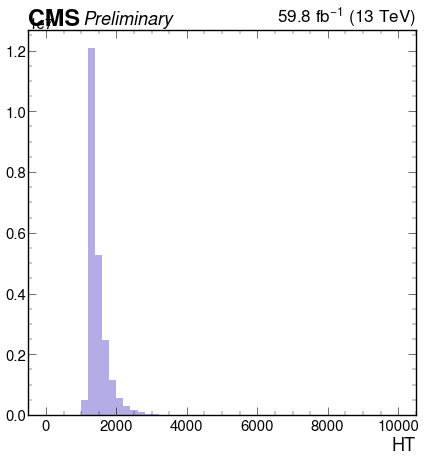

In [13]:
plot_label = 'ht_Cluster70'
year = '2018'

temp = '2.0'
mPhi = '2.0'
decay = 'hadronic'
samples = ['TTJets_'+year, 'QCD_HT_'+year, 
            'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
            'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC',
          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(default_colors[sample])
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(default_colors[sample])
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e7)
plt.xlim(1200,10000)
plt.legend(loc='best')
plt.yscale("log")

# save and show
if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

## 1D Comparison - # Constituents

In [26]:
colors = {
    "125": "cyan",
    "200": "blue",
    "300": "lightseagreen",
    "400": "green",
    "500": "darkgreen",
    "600": "lawngreen",
    "700": "goldenrod",
    "800": "orange",
    "900": "sienna",
    "1000": "red",
    "data": "maroon",
    "QCD": "slateblue",
    "MC": "slateblue",
    "TTJets": "midnightblue"
}
def getColor(sample):
    if 'mS' in sample:
        sample = sample[sample.find("mS")+2:]
        sample = sample.split("_")[0]
        return colors[sample]
    
    if 'QCD' in sample:
        return colors['QCD']
    
    if 'data' in sample.lower():
        return colors['data']
    
    if 'ttjets' in sample.lower():
        return colors['TTJets']
    
    if 'MC' in sample:
        return colors['MC']

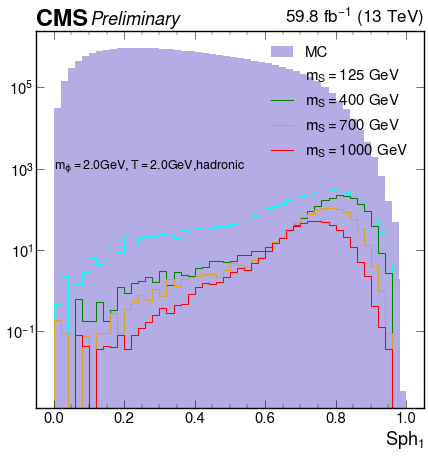

In [56]:
plot_label = 'SUEP_S1_Cluster70'
year = '2018'

temp = '2.0'
mPhi = '2.0'
decay = 'hadronic'
samples = ['MC_'+year, 
            'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
            'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['MC',
          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
hep.histplot(hSignal, yerr=False, label=lSignal, color=cSignal, stack=False) 

plt.text(0.0, 1e3, r'$m_{\phi}='+mPhi+' GeV, T='+temp+' GeV$,'+decay, fontsize='x-small')
# tweak these by hand, as needed
#plt.ylim(1e-1,2e6)
#plt.xlim(1200,10000)
plt.legend(loc='best')
plt.yscale("log")

# save and show
if saveToAN: plt.savefig(AN_label.format(plot_label+"_mPhi"+mPhi+"_T"+temp+"_"+decay+"_"+year))
plt.savefig(output_label+plot_label+"_mPhi"+mPhi+"_T"+temp+"_"+decay+"_"+year+file_ext)
plt.show()

## 1D Comparison - S1

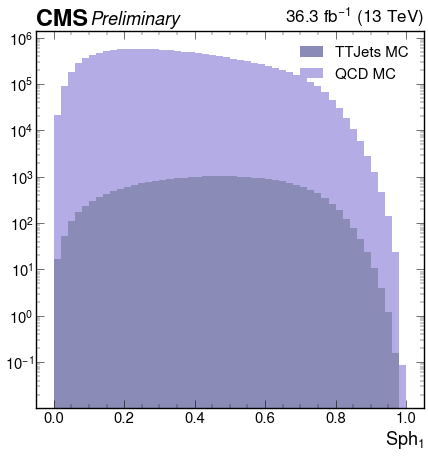

In [16]:
plot_label = 'SUEP_S1_Cluster70'
year = '2016'

samples = ['TTJets_'+year, 'QCD_HT_'+year, 
            'mS125_T2.0_mPhi2.0_hadronic_'+year,
            'mS400_T2.0_mPhi2.0_hadronic_'+year,
            'mS700_T2.0_mPhi2.0_hadronic_'+year,
            'mS1000_T2.0_mPhi2.0_hadronic_'+year]
labels = ['TTJets MC', 'QCD MC', r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(default_colors[sample])
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(default_colors[sample])
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
if len(hSignal)>0: hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
#plt.ylim(1e-1,1e8)
#plt.xlim(1200,10000)
plt.legend(loc='best')
plt.yscale("log")

# save and show
if saveToAN: plt.savefig(AN_label.format("sph_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

## Compare Variables

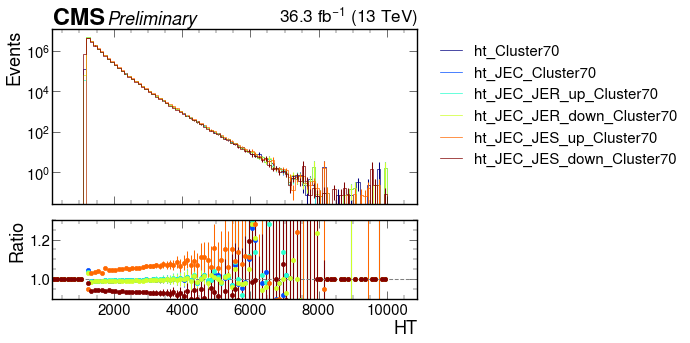

In [18]:
variables = ['ht_Cluster70', 'ht_JEC_Cluster70', 
             'ht_JEC_JER_up_Cluster70', 'ht_JEC_JER_down_Cluster70',
             'ht_JEC_JES_up_Cluster70', 'ht_JEC_JES_down_Cluster70']
year = '2016'
sample = 'QCD_HT_'+year
density = False

hlist = []
for var in variables:
    h = plots[sample][var]
    if density: h = h/h.sum().value
    hlist.append(h)

fig, axs = plot_ratio(hlist, labels=variables)
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02,1))
axs[1].set_ylim(0.9,1.3)

if saveToAN: fig.savefig(AN_label.format("HT_ratio_"+sample), bbox_inches='tight')
fig.savefig(output_label+"HT_ratio_"+sample+file_ext, bbox_inches='tight')
fig.show()

## SUEP ISR Comparison

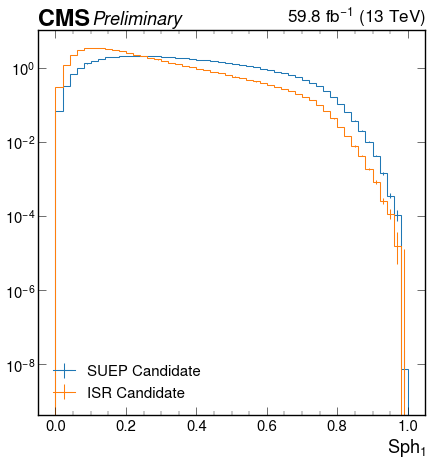

In [13]:
variable = 'S1'
year = '2018'
sample = 'MC_{}'.format(year)
density = True

plot_labels = ['SUEP_{}_Cluster70'.format(variable), 
               'ISR_{}_ClusterInverted'.format(variable)]
objects = ['SUEP Candidate', 'ISR Candidate']

fig, ax = plt.subplots()
hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))

for plot_label, obj in zip(plot_labels, objects): 
    h = plots[sample][plot_label][:200j:2j]
    hep.histplot(h, yerr=True, density=density, label=obj) 

fig.axes[0].set_yscale("log")
fig.axes[0].legend()

# save and show
if saveToAN: plt.savefig(AN_label.format("ISR_SUEP_"+variable))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

## Backgrounds

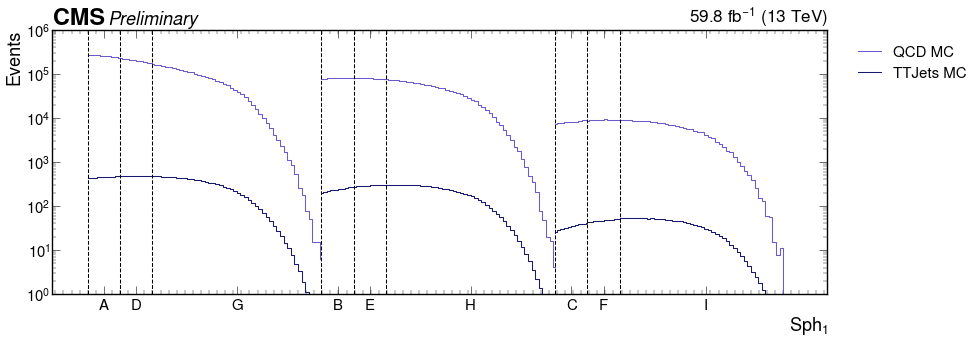

In [86]:
x = 'ABCDEFGHI'
y = 'ADGBEHCFI'
year = '2018'
plot_labels = ['SUEP_S1_Cluster70']
samples = ['QCD_HT_'+year, 'TTJets_'+year]
#samples = ['QCD_HT_'+year]
labels = ['QCD MC', 'TTJets MC']
#labels = ['QCD']

for plot_label in plot_labels:

    fig, ax = plot_all_regions(plots, 'A_'+plot_label, samples, 
                               labels=labels, regions=y, density=False)
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=ax)

    ax.set_ylim(1e0, 1e6)
    ax.set_xlabel(r"$Sph_1$")

    if saveToAN: fig.savefig(AN_label.format('backgrounds_'+year), bbox_inches='tight')
    fig.savefig(output_label + 'backgrounds_' + year + file_ext, bbox_inches='tight')

## Extended ABCD

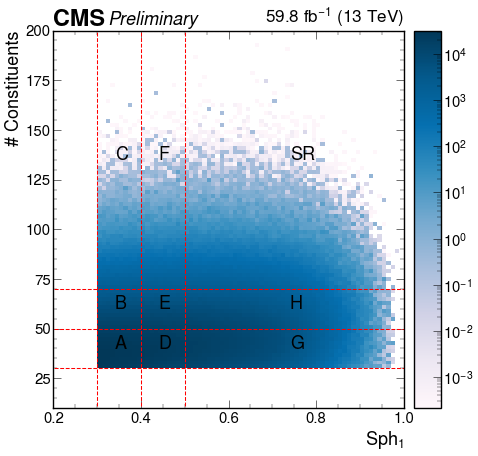

In [12]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2018'
samples = ['QCD_HT_'+year, 'TTJets_'+year] # NOTE: these are ADDED

draw_lines = True
lines_x = [0.3, 0.4, 0.5, 1.0]
lines_y = [30, 50, 70, 200]

fig, ax = plt.subplots(figsize=(10, 10))

k = 0
regions = ['A','B','C','D','E','F','G','H','SR']
for i in range(len(lines_x)-1):
    for j in range(len(lines_y)-1):
        xloc = (lines_x[i+1] + lines_x[i])/2 - 0.01
        yloc = (lines_y[j+1] + lines_y[j])/2
        plt.text(xloc, yloc, regions[k])
        k+=1
    
for i, sample in enumerate(samples):
    if i == 0: h = plots[sample][plot_label].copy()
    else: h += plots[sample][plot_label].copy()
    
bins = np.linspace(0,500,10)
h = h[0.3j:,30j::2j]

hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
_ = hep.hist2dplot(h, 
           norm=matplotlib.colors.LogNorm(),
           cmap = 'PuBu',
           cbar=True,
           label=sample) 

# draw lines to visualize ABCD regions
if draw_lines:
    for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')

plt.ylim(10,200)
plt.xlim(0.2,1.0)

if saveToAN: plt.savefig(AN_label.format("extendedABCD_regions_2018"))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

KeyError: 'QCD_HT_2018'

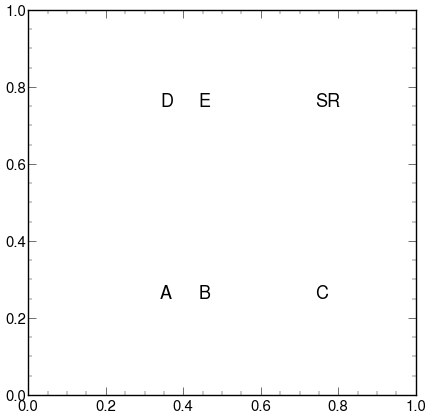

In [76]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
sample = 'QCD_HT_2018'
#samples += ['SUEP-m125-generic', 'SUEP-m400-generic', 'SUEP-m750-generic', 'SUEP-m1000-generic']
draw_lines = True
lines_x = [0.3,0.4, 0.5, 1.0]
lines_y = [0,0.5,1]

fig, ax = plt.subplots(figsize=(10, 10))

k = 0
regions = ['A','B','C','D','E','SR']
for i in range(len(lines_y)-1):
    for j in range(len(lines_x)-1):
        xloc = (lines_x[j+1] + lines_x[j])/2 - 0.01
        yloc = (lines_y[i+1] + lines_y[i])/2
        plt.text(xloc, yloc, regions[k])
        k+=1
    
if plots[sample][plot_label].sum().value == 0:
    print("Histogram empty for sample", sample)

h = plots[sample][plot_label]
h = h[0.3j:,:]

hep.cms.label(llabel='Preliminary',data=False, lumi=61.0)
_ = hep.hist2dplot(h, 
           norm=matplotlib.colors.LogNorm(),
           cmap = 'PuBu',
           cbar=True,
           label=sample) 

# draw lines to visualize ABCD regions
if draw_lines:
    for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')

plt.ylim(0,1)
plt.xlim(0.2,1.0)

if saveToAN: plt.savefig(AN_label.format("ML_extendedABCD_regions_2018"))
plt.savefig(output_label+""+file_ext)
plt.show()

## 2D Distributions

mS600_T4.0_mPhi4.0_generic_2018


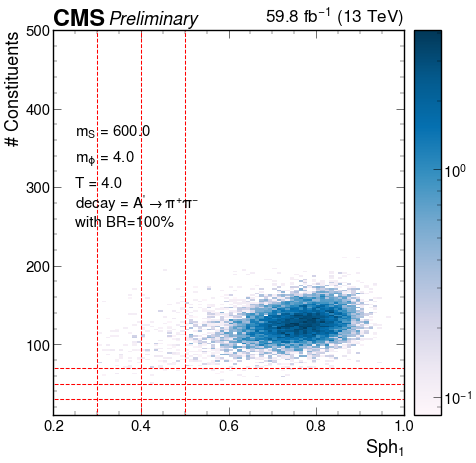

mS600_T4.0_mPhi8.0_generic_2018


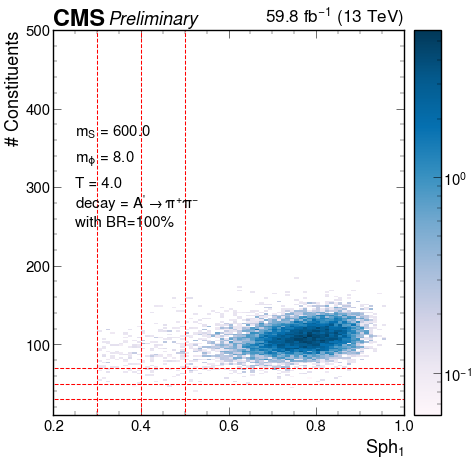

mS600_T4.0_mPhi2.0_generic_2018


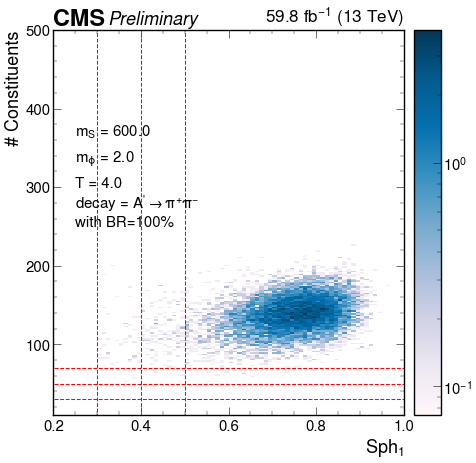

mS400_T2.0_mPhi2.0_generic_2018


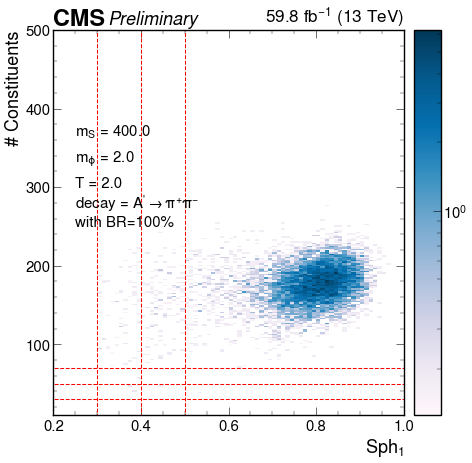

mS600_T2.0_mPhi2.0_generic_2018


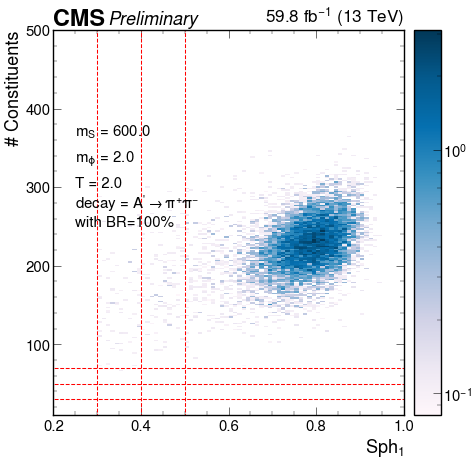

mS500_T2.0_mPhi2.0_generic_2018


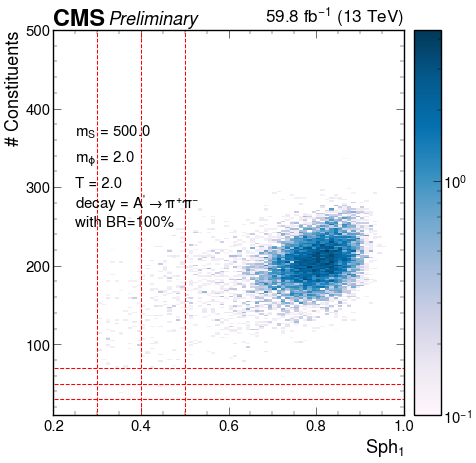

mS125_T2.0_mPhi2.0_generic_2018


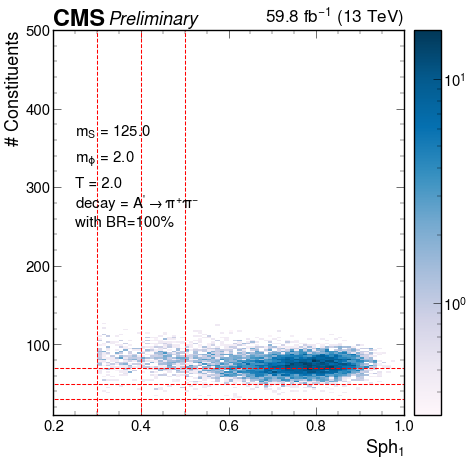

mS700_T2.0_mPhi2.0_generic_2018


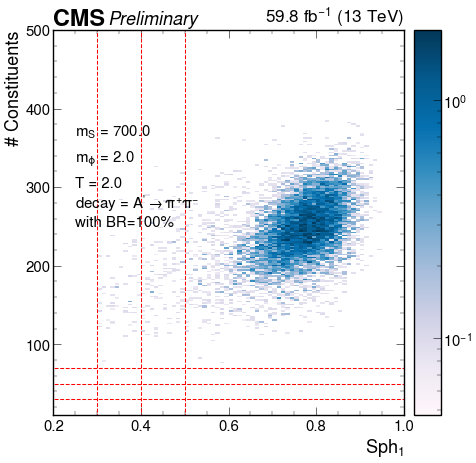

mS900_T2.0_mPhi2.0_generic_2018


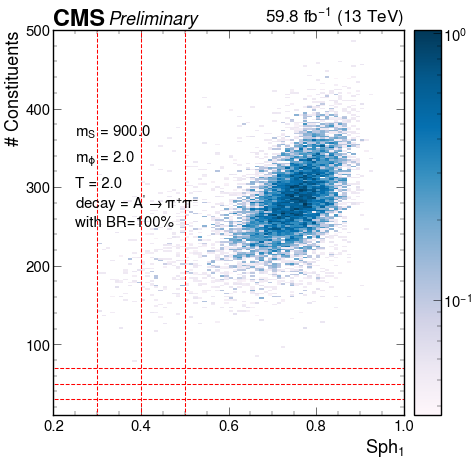

mS200_T2.0_mPhi2.0_generic_2018


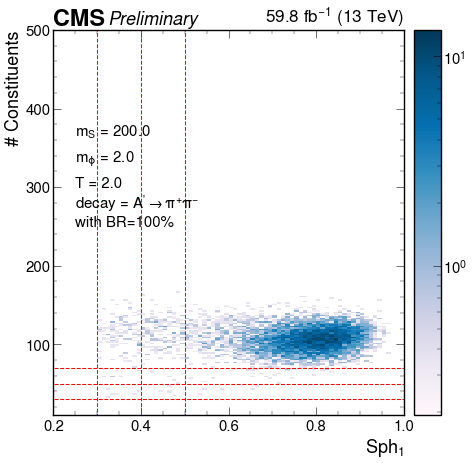

mS800_T2.0_mPhi2.0_generic_2018


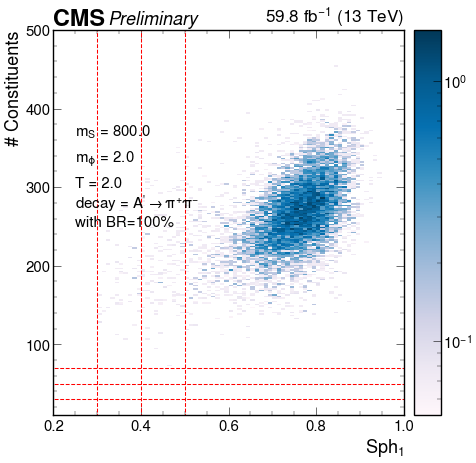

mS1000_T2.0_mPhi2.0_generic_2018


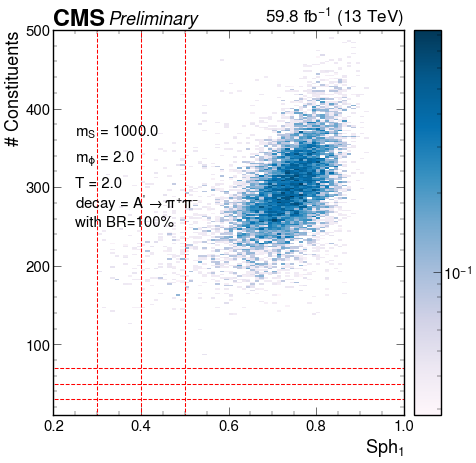

mS300_T2.0_mPhi2.0_generic_2018


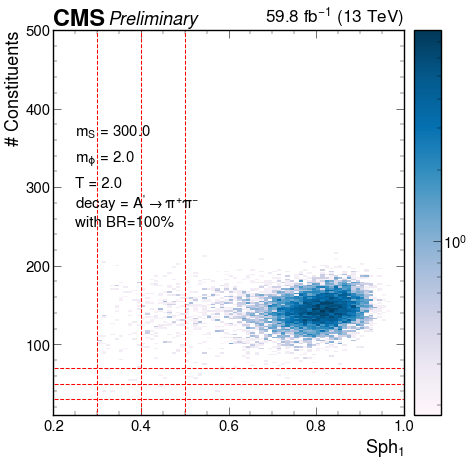

mS500_T0.75_mPhi3.0_generic_2018


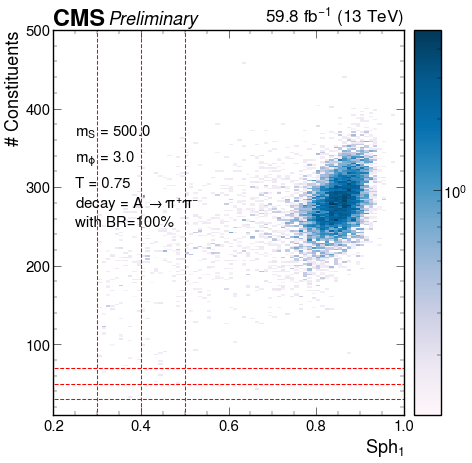

mS500_T12.0_mPhi3.0_generic_2018


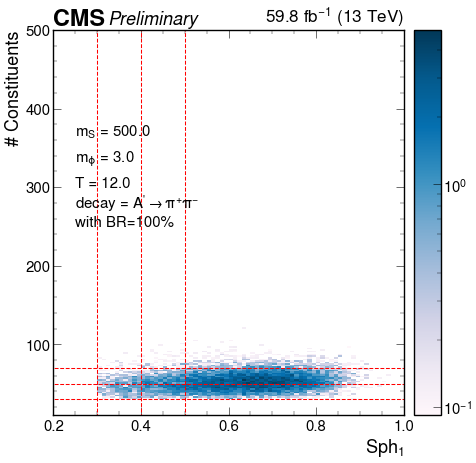

mS500_T3.0_mPhi3.0_generic_2018


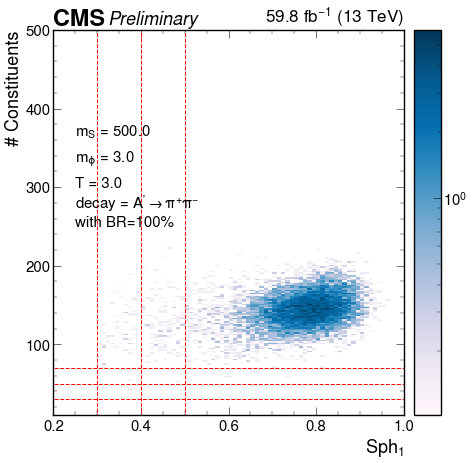

mS500_T1.5_mPhi3.0_generic_2018


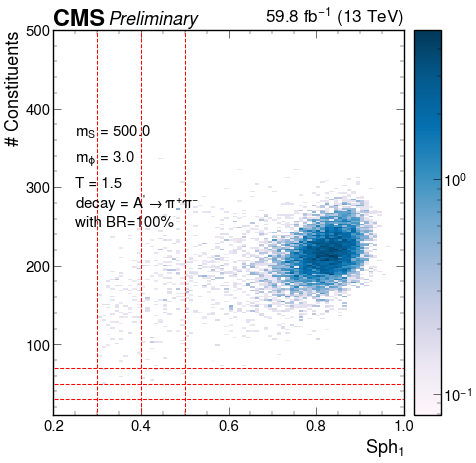

mS500_T6.0_mPhi3.0_generic_2018


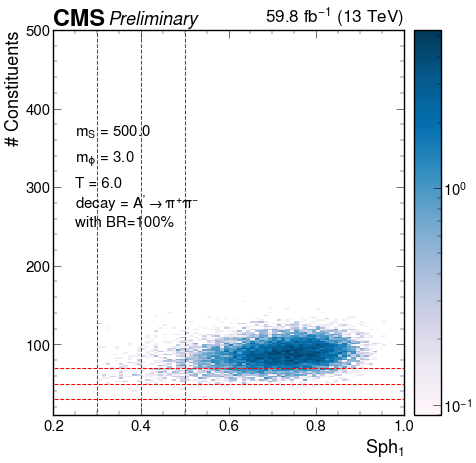

QCD_HT_2018


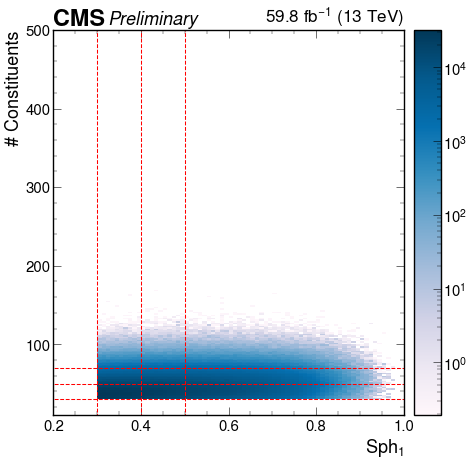

In [118]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2018'
samples = [x for x in plots.keys() if 'mS' in x] + ['QCD_HT_'+year]

draw_lines = True
lines_x = [0.3, 0.4, 0.5]
lines_y = [30, 50, 70]

fig, ax = plt.subplots(figsize=(10, 10))

decays = {
    'hadronic' : r"$A^' \rightarrow e^{+}e^{-},\mu^{+}\mu^{-},\pi^{+}\pi^{-}$""\n""with BR=15,15,70%",
    'leptonic' : r"$A^' \rightarrow e^{+}e^{-},\mu^{+}\mu^{-},\pi^{+}\pi^{-}$""\n""with BR=40,40,20%",
    'generic' : r"$A^' \rightarrow \pi^{+}\pi^{-}$""\n""with BR=100%"
}
    
for i, sample in enumerate(samples):
    h = plots[sample][plot_label]
    
    print(sample)
    
    bins = np.linspace(0,500,10)
    h = h[0.3j:,30j::2j]

    hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
    _ = hep.hist2dplot(h, 
               norm=matplotlib.colors.LogNorm(),
               cmap = 'PuBu',
               cbar=True,
               label=sample) 

    # draw lines to visualize ABCD regions
    if draw_lines:
        for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
        for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')

    plt.ylim(10,500)
    plt.xlim(0.2,1.0)
    
    if 'mS' in sample:
        split = sample.split('_')
        (Mass,t,mdark,decay) = (float(split[0][2:]),float(split[1][1:]),float(split[2][4:]),split[3])

        plt.text(0.25, 366,r"$m_S$ = {}".format(Mass), fontsize='small')
        plt.text(0.25, 333,r"$m_\phi$ = {}".format(mdark), fontsize='small')
        plt.text(0.25, 300,"T = {}".format(t), fontsize='small')
        plt.text(0.25, 250,"decay = {}".format(decays[decay]), fontsize='small')

    if saveToAN: plt.savefig(AN_label.format("{}_{}_{}".format(plot_label, sample, year)))
    plt.savefig(output_label+plot_label+"_"+sample+"_"+year+file_ext)
    plt.show()

## ABCD - QCD Background

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


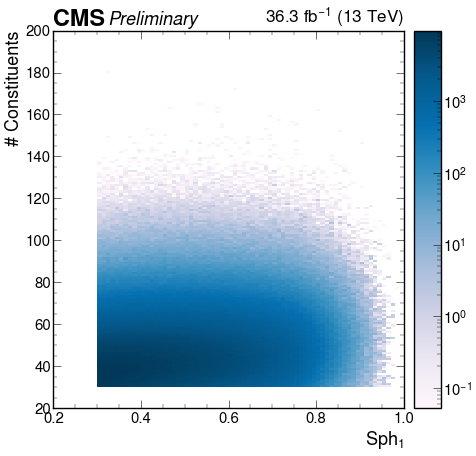

In [20]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2016'
sample = 'QCD_HT_'+year
doLinearFit = False

fig, ax = plt.subplots(figsize=(10, 10))
    
if plots[sample][plot_label].sum().value == 0:
    print("Histogram empty for sample", sample)

h = plots[sample][plot_label]
h = h[0.3j:,30j:]

hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
_ = hep.hist2dplot(h, 
           norm=matplotlib.colors.LogNorm(),
           cmap = 'PuBu',
           cbar=True,
           label=sample) 

if doLinearFit:
    p = linearFit2DHist(h)
    plt.plot(h.axes[0].centers, p(h.axes[0].centers), label="Linear fit result:"+str(p), color='black', linestyle='dashed')

plt.ylim(20,200)
plt.xlim(0.2,1.0)
plt.legend()

if saveToAN: plt.savefig(AN_label.format("2D_decorrelate_"+year))
plt.savefig(output_label+"2D_decorrelate_"+year+file_ext)
plt.show()

Text(0, 1, 'Error on $\\int^{UB}_{70} F ~/~ \\int^{UB}_{70} C$')

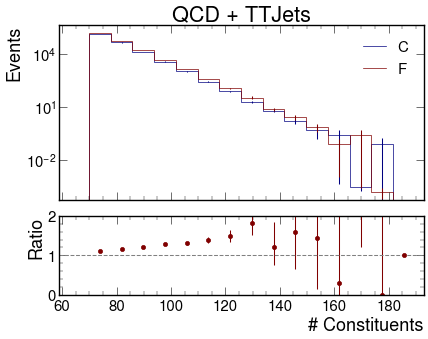

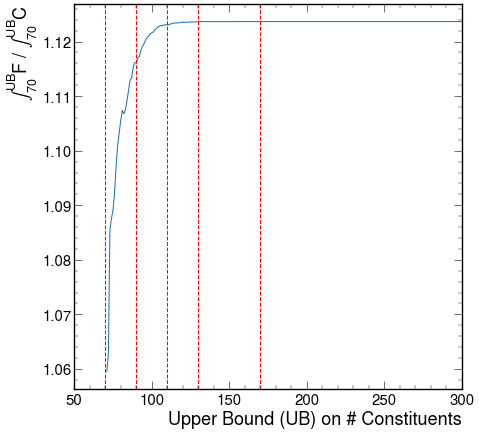

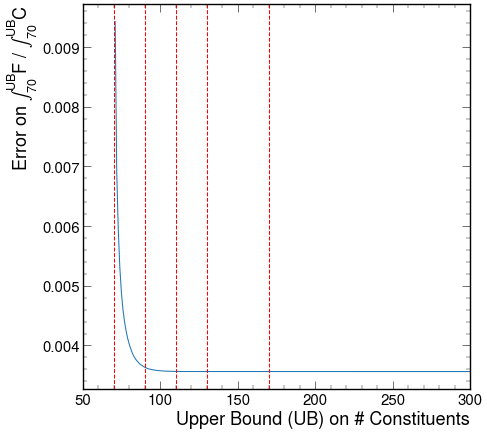

In [65]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = 'all'
sample = 'MC'
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 1000j]

abcd = plots["{}_{}".format(sample,year)][plot_label].copy()

C = abcd[xregions[0]:xregions[1]:sum, yregions[-2]:]
F = abcd[xregions[1]:xregions[2]:sum, yregions[-2]:]

fig, axs = plot_ratio([C[::8j],F[::8j]], ['C', 'F'])
axs[1].set_ylim(0,2)
axs[0].set_title("QCD + TTJets")

cuts = np.linspace(yregions[-2].imag+1, yregions[-1].imag, int((yregions[-1].imag-yregions[-2].imag)))
ratios = []
errs = []
for n in cuts:
    sumC = C[yregions[-2]:n*1.0j].sum().value
    sumF = F[yregions[-2]:n*1.0j].sum().value
    err = np.sqrt( sumF/sumC**2 + sumF**2 / sumC**3)
    ratios.append(sumF/sumC)
    errs.append(err)
        
fig = plt.figure()
ax = fig.subplots()
ax.plot(cuts, ratios)
ax.axvline(70, color='red', linestyle='dashed')
ax.axvline(90, color='red', linestyle='dashed')
ax.axvline(110, color='red', linestyle='dashed')
ax.axvline(130, color='red', linestyle='dashed')
ax.axvline(170, color='red', linestyle='dashed')
ax.axvline(500, color='red', linestyle='dashed')
ax.set_xlim(50, 300)
ax.set_xlabel("Upper Bound (UB) on # Constituents")
ax.set_ylabel(r"$\int^{UB}_{70} F ~/~ \int^{UB}_{70} C$")

fig = plt.figure()
ax = fig.subplots()
ax.plot(cuts, errs)
ax.axvline(70, color='red', linestyle='dashed')
ax.axvline(90, color='red', linestyle='dashed')
ax.axvline(110, color='red', linestyle='dashed')
ax.axvline(130, color='red', linestyle='dashed')
ax.axvline(170, color='red', linestyle='dashed')
ax.axvline(500, color='red', linestyle='dashed')
ax.set_xlim(50, 300)
ax.set_xlabel("Upper Bound (UB) on # Constituents")
ax.set_ylabel(r"Error on $\int^{UB}_{70} F ~/~ \int^{UB}_{70} C$")

Chi^2: 9.298016601992845
Chi^2: 3.3412191633179575
[   0.99330878    1.10871143    1.21839344    1.16276728 -337.03979823]
[  0.98916119   1.08192711   1.10147377   1.15789392 140.0719558 ]


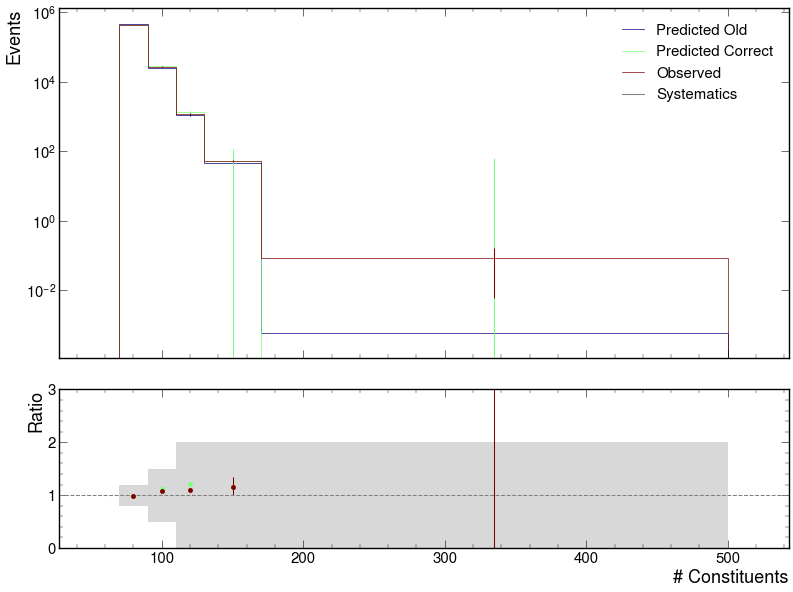

In [77]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
#plot_label = '2D_ISR_S1_vs_ISR_nconst_ClusterInverted'
year = 'all'
sample = 'MC'
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 300j]
new_bins = [70, 90, 110, 130, 170, 500]


abcd = plots["{}_{}".format(sample,year)][plot_label].copy()

A = abcd[xregions[0] : xregions[1] : sum, yregions[0] : yregions[1]].sum().value
B = abcd[xregions[0] : xregions[1] : sum, yregions[1] : yregions[2]].sum().value
C = abcd[xregions[0] : xregions[1] : sum, yregions[2] : yregions[3]]
D = abcd[xregions[1] : xregions[2] : sum, yregions[0] : yregions[1]].sum().value
E = abcd[xregions[1] : xregions[2] : sum, yregions[1] : yregions[2]].sum().value
F = abcd[xregions[1] : xregions[2] : sum, yregions[2] : yregions[3]]
G = abcd[xregions[2] : xregions[3] : sum, yregions[0] : yregions[1]].sum().value
H = abcd[xregions[2] : xregions[3] : sum, yregions[1] : yregions[2]].sum().value
SR = abcd[xregions[2] : xregions[3] : sum, yregions[2] : yregions[3]]

SR = rebin_piecewise(SR, np.array(new_bins))

_, SR_exp, alpha, sigma_alpha = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')
SR_exp = rebin_piecewise(SR_exp, new_bins)


preds, preds_err = [], []
prev, prev_err = 0, 0
for iBin in range(len(new_bins)-1):
    lo = new_bins[0]*1.0j
    hi = new_bins[iBin+1]*1.0j
    integral = ((F[lo:hi].sum().value**2)*(H**2)*(D**2)*(B**2)) / (G*C[lo:hi].sum().value*A*(E**4))
    err = integral*np.sqrt(4*(F[lo:hi].sum().value**-1) + 4*(D**-1) + 4*(H**-1) + 4*(B**-1) + (G**-1) + \
                            + C[lo:hi].sum().value**-1 + A**-1 + 16*(E**-1))
    pred = integral - prev
    pred_err = np.sqrt(err**2 + prev_err**2) # FIXME: this is a huge overestimation
    prev = integral if integral > 0 else 0
    prev_err = err if err > 0 else 0
    preds.append(pred)
    preds_err.append(pred_err)
    
h_out = hist.Hist(
    hist.axis.Variable(new_bins, label='# Constituents', name='SUEP_nconst'),
    storage=hist.storage.Weight(),
)
h_out[:] = np.stack([preds, preds_err], axis=-1)

# chi2 test
tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
chi2 = np.sum(np.where(tot_sigma > 0, (SR.values() - SR_exp.values())**2 / tot_sigma**2, 0)) / len(tot_sigma[tot_sigma > 0])
print("Chi^2:", chi2)

# chi2 test
tot_sigma = np.sqrt(SR.variances() + h_out.variances())
chi2 = np.sum(np.where(tot_sigma > 0, (SR.values() - h_out.values())**2 / tot_sigma**2, 0)) / len(tot_sigma[tot_sigma > 0])
print("Chi^2:", chi2)

fig, axs = plot_ratio([SR_exp, h_out, SR], systs=[0.2,0.5,1.0,1.0,1.0], labels=['Predicted Old', 'Predicted Correct', 'Observed'])
axs[1].set_ylim(0.0,3)
fig.set_size_inches(20,20)

print(axs[1].lines[0].get_ydata())
print(axs[1].lines[1].get_ydata())
    

## ABCD - MC Closure

WeightedSum(value=1.40059e+07, variance=1.89271e+07)
Scaling factor alpha: 2.20988970111033
Sigma alpha: 0.0208048899085544
Chi^2: 3.824136251752047
[  0.99750721   1.06140912   1.05867357   1.26070297 428.05597752]


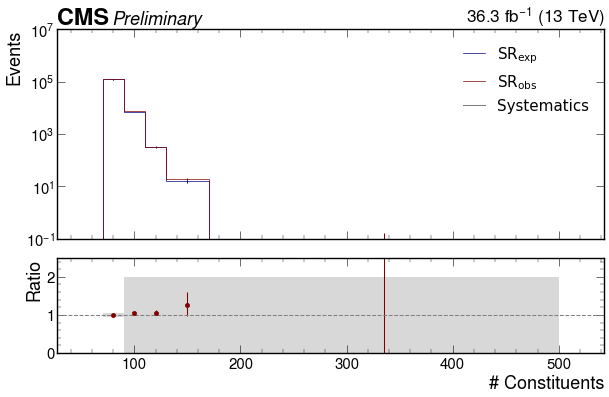

In [86]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2016'
samples = ['MC'] # these are ADDED
rebin = True
new_bins = [70, 90, 110, 130, 170, 500]
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 300j]

systs = {
 '2018': [0.2,0.5,1.0,1.0,1.0],
 '2017': [0.05,0.6,1.0,1.0,1.0],
 '2016': [0.05,1.0,1.0,1.0,1.0]
}

for i, sample in enumerate(samples):
    if i == 0: abcd = plots["{}_{}".format(sample,year)][plot_label].copy()
    else: abcd += plots["{}_{}".format(sample,year)][plot_label].copy()
    
print(abcd.sum())

SR, SR_exp, alpha, sigma_alpha = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')

if rebin:
    edges = SR.axes[0].edges
    SR = rebin_piecewise(SR, new_bins)
    SR_exp = rebin_piecewise(SR_exp, new_bins)

print("Scaling factor alpha:", alpha)
print("Sigma alpha:", sigma_alpha)

# pull test
diffs = np.abs(SR_exp.values() - SR.values())
tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
pull_ratios = np.where(tot_sigma > 0, diffs/tot_sigma, 0) + 1

# chi2 test
tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
chi2 = np.sum(np.where(tot_sigma > 0, (SR.values() - SR_exp.values())**2 / tot_sigma**2, 0)) / len(tot_sigma[tot_sigma > 0])
print("Chi^2:", chi2)

# use the custom plot_ratio
# the hist implementation used elsewhere in the notebook doesn't use the 
# errors in the hists' bins to calculate the errors in the ratio plot
fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"], systs=systs[year])
#_ = axs[0].scatter([], [], marker='+', label='Pull')
#_ = axs[1].scatter(SR.axes[0].centers, pull_ratios, marker='+', label='Pull')
fig.set_size_inches(15, 12)
#_ = axs[0].plot([],[],' ',label=r'$\chi^2$: {}'.format(round(chi2,1)))
_ = axs[1].set_ylim(0.0, 2.5)
_ = axs[0].set_ylim(1e-1, 1e7)
#_ = axs[0].set_xlim(100, 150)
_ = axs[0].legend(prop={"family":"DejaVu Sans"})
#_ = axs[1].set_yticks(ticks=[0,1,2], labels=['-1','0','1'])
#_ = axs[1].set_ylabel("1 - Ratio")
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=axs[0])

print(axs[1].lines[0].get_ydata())

#if saveToAN: plt.savefig(AN_label.format("closure_MC_"+year))
#plt.savefig(output_label+"closure_"+year+file_ext)

## ABCD - ISR Closure

Scaling factor alpha: 2.22844473463216
Sigma alpha: 0.179838602998033
[0.88705418 1.04719521 0.33732782 1.         1.        ]


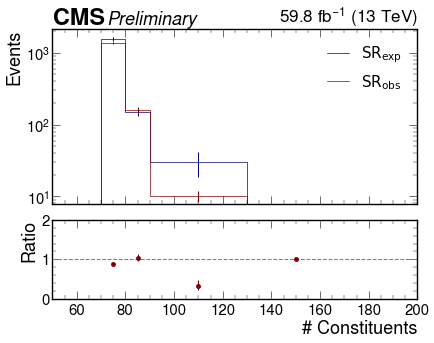

In [8]:
plot_label = '2D_ISR_S1_vs_ISR_nconst_ClusterInverted'
year = '2018'
sample = 'MC'
rebin = True
#xregions = [0.25j, 0.35j, 0.45j, 500j] # pre approval
xregions = [0.3j, 0.4j, 0.5j, 500j] # SUEP [OFFICIAL]

#yregions = [25j, 40j, 55j, 500j] # Pieter
#yregions = [30j, 45j, 60j, 500j] # pre approval
yregions = [30j, 50j, 70j, 500j] # SUEP [OFFICIAL]

#new_bins = [60, 70, 80, 90, 150, 500] # pre approval
# new_bins = [55,60,70,80,150,500] # Pieter
#new_bins = [70, 90, 110, 130, 170, 500] # SUEP + initial bin
new_bins = [70, 90, 110, 130, 170, 1000] # SUEP [OFFICIAL]
#new_bins = [70, 80, 90, 130, 170, 1000] # modified (method 2)


abcd = plots["{}_{}".format(sample,year)][plot_label]
SR, SR_exp, alpha, sigma_alpha = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')

if rebin:
    edges = SR.axes[0].edges
    SR = rebin_piecewise(SR, new_bins)
    SR_exp = rebin_piecewise(SR_exp, new_bins)

print("Scaling factor alpha:", alpha)
print("Sigma alpha:", sigma_alpha)

# use the custom plot_ratio
# the hist implementation used elsewhere in the notebook doesn't use the 
# errors in the hists' bins to calculate the errors in the ratio plot
fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"])
_ = axs[1].set_ylim(0,2)
_ = axs[1].set_xlim(50, 200)
_ = axs[0].legend(prop={"family":"DejaVu Sans"})
#_ = axs[1].set_yticks(ticks=[0,1,2], labels=['-1','0','1'])
#_ = axs[1].set_ylabel("1 - Ratio")
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=axs[0])

print(axs[1].lines[0].get_ydata())

# if saveToAN: plt.savefig(AN_label.format("ISR_closure_"+sample+"_"+year))
plt.savefig(output_label+"ISR_closure_"+sample+"_"+year+file_ext)
plt.savefig(output_label+"ISR_closure_"+sample+"_"+year+".png")

Scaling factor alpha: 2.09990898861859
Sigma alpha: 0.131787804728613


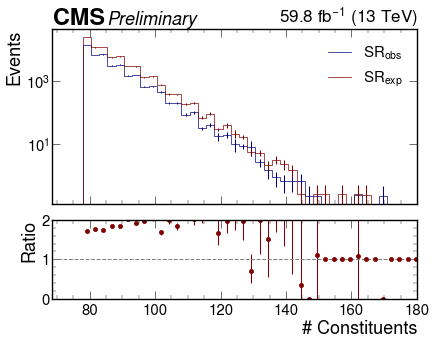

In [15]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2018'

abcd = plots['QCD_HT_'+year][plot_label]

# 2D_SUEP_S1_vs_SUEP_nconst_Cluster
# 2D_ISR_S1_vs_ISR_nconst_ClusterInverted
xregions = [0.35j, 0.5j, 1.0j]
yregions = [10j, 80j, 300j]

# 2D_SUEP_S1_vs_SUEP_nconst_Cluster
# 2D_ISR_S1_vs_ISR_nconst_ClusterInverted
# xregions = [0.35j, 0.4j, 0.5j, 1.0j]
# yregions = [20j, 40j, 60j, 300j]

# 2D_ISR_S1_ISR_nconst_CL
# xregions = [0.35j, 0.4j, 0.5j, 1.0j]
# yregions = [0.0j, 30j, 60j, 300j]

# 2D_SUEP_S1_SUEP_nconst_CL (scouting)
# xregions = [0.35j, 0.4j, 0.5j, 1.0j]
# yregions = [10.0j, 35j, 60j, 300j]

SR, SR_exp = ABCD_4regions(abcd, xregions, yregions, sum_var='x')

print("Scaling factor alpha:", alpha)
print("Sigma alpha:", sigma_alpha)

# use the custom plot_ratio
# the hist implementation used elsewhere in the notebook doesn't use the 
# errors in the hists' bins to calculate the errors in the ratio plot
fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[1].set_ylim(0,2)
_ = axs[0].legend()
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=axs[0])


if saveToAN: plt.savefig(AN_label.format("4region_closure_"+year))
plt.savefig(output_label+"4region_closure_"+year+file_ext)

## ABCD - MC ML Closure

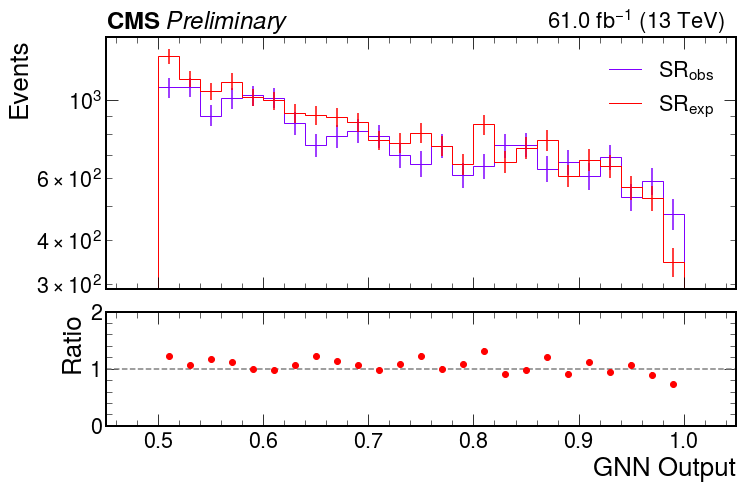

In [43]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
year = '2018'
abcd = plots['QCD_HT_'+year][plot_label]

xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [0.0j, 0.5j, 1.0j]

SR, SR_exp = ABCD_6regions(abcd, xregions, yregions, sum_var='x')

SR = SR[::2j]
SR_exp = SR_exp[::2j]

fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[1].set_ylim(0,2)
_ = axs[0].legend()
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=axs[0])


if saveToAN: plt.savefig(AN_label.format("ML_closure_"+year))
plt.savefig(output_label+"ML_closure_"+year+file_ext)

## New Table

In [28]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2018'
abcdBkg = plots['QCD_HT_'+year][plot_label]
masses = [125, 400, 700, 1000]
T = '2.0'
mPhi = '2.0'
decay = 'hadronic'
xcut = 0.5j
ycut = 70j


def calcEff(abcd, xcut, ycut):
    import hist
    
    n = abcd.sum().value
    n_cuty = abcd[:,ycut:].sum().value
    n_cutx = abcd[xcut:, ycut:].sum().value
    print(n, n_cuty)
    eff1 = n_cuty/n
    eff2 = n_cutx/n_cuty
    err_eff1 = hist.intervals.ratio_uncertainty(np.array([n_cuty]), np.array([n]))
    err_eff2 = hist.intervals.ratio_uncertainty(np.array([n_cutx]), np.array([n_cuty]))
    
    return eff1, err_eff1, eff2, err_eff2
  
print("Background:", calcEff(abcdBkg, xcut, ycut))

for mass in masses:
    sample = 'mS{}_T{}_mPhi{}_{}_{}'.format(mass, T, mPhi, decay, year)
    label = r'$m_{S}={'+str(mass)+'}$ GeV'
    abcd = plots[sample][plot_label]
    print("Mass",mass, calcEff(abcd, xcut, ycut))

22648743.13732007 451880.361292301
Background: (0.019951674958408754, array([[2.96802440e-05],
       [2.97244294e-05]]), 0.44923241444955675, array([[0.00099706],
       [0.00099928]]))
3924.51801191327 2391.394837250065
Mass 125 (0.6093473975634065, array([[0.01245974],
       [0.01271716]]), 0.8574448005170515, array([[0.01893399],
       [0.01935677]]))
1724.5239499116908 1720.0461285434615
Mass 400 (0.9974034449516004, array([[0.02404688],
       [0.02463374]]), 0.9753435385184231, array([[0.02381034],
       [0.02439882]]))
908.6870513924056 908.0805018695584
Mass 700 (0.9993324989919051, array([[0.03315645],
       [0.03427521]]), 0.973589040067892, array([[0.03273736],
       [0.03385712]]))
450.8815494903928 450.8023666541832
Mass 1000 (0.9998243821768731, array([[0.04707276],
       [0.04934293]]), 0.9751720226710764, array([[0.04649246],
       [0.04876369]]))


## Validation Region

Scaling factor alpha: 2.20652112321292
Sigma alpha: 0.0249674064884691
Chi^2: 1.4039537397771096


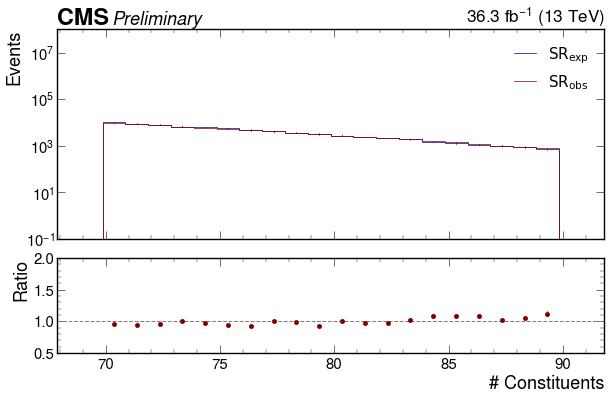

In [63]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2016'
samples = ['data']
rebin = False
new_bins = [70, 80, 90]
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 300j]

for i, sample in enumerate(samples):
    if i == 0: abcd = plots["{}_{}".format(sample,year)][plot_label].copy()
    else: abcd += plots["{}_{}".format(sample,year)][plot_label].copy()
    
SR, SR_exp, alpha, sigma_alpha = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')

if rebin:
    edges = SR.axes[0].edges
    SR = rebin_piecewise(SR, new_bins)
    SR_exp = rebin_piecewise(SR_exp, new_bins)

print("Scaling factor alpha:", alpha)
print("Sigma alpha:", sigma_alpha)

# pull test
diffs = np.abs(SR_exp.values() - SR.values())
tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
pull_ratios = np.where(tot_sigma > 0, diffs/tot_sigma, 0) + 1

# chi2 test
tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
chi2 = np.sum(np.where(tot_sigma > 0, (SR.values() - SR_exp.values())**2 / tot_sigma**2, 0)) / len(tot_sigma[tot_sigma > 0])
print("Chi^2:", chi2)

# validation region
SR = SR[70j:90j]
SR_exp = SR_exp[70j:90j]

# use the custom plot_ratio
# the hist implementation used elsewhere in the notebook doesn't use the 
# errors in the hists' bins to calculate the errors in the ratio plot
fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"])
#_ = axs[0].scatter([], [], marker='+', label='Pull')
#_ = axs[1].scatter(SR.axes[0].centers, pull_ratios, marker='+', label='Pull')
fig.set_size_inches(15, 12)
# _ = axs[0].plot([],[],' ',label=r'$\chi^2$: {}'.format(round(chi2,1)))
_ = axs[1].set_ylim(0.5, 2)
_ = axs[0].set_ylim(1e-1, 1e8)
#_ = axs[0].set_xlim(100, 150)
_ = axs[0].legend(prop={"family":"DejaVu Sans"})
#_ = axs[1].set_yticks(ticks=[0,1,2], labels=['-1','0','1'])
#_ = axs[1].set_ylabel("1 - Ratio")
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=axs[0])

if saveToAN: plt.savefig(AN_label.format("closure_validation_"+year))
plt.savefig(output_label+"closure_validation_"+year+file_ext)

## ABCD - Final

In [44]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2018'
abcdBkg = plots['QCD_HT_'+year][plot_label] + plots['TTJets_'+year][plot_label]
masses = [125, 400, 1000]
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 500j]

SR, SR_exp, alpha, sigma_alpha = ABCD_9regions_errorProp(abcdBkg, xregions, yregions, sum_var='x')
_, SR_exp_data, _, _ = ABCD_9regions_errorProp(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')

print(SR_exp_data.sum().value, np.sqrt(SR_exp_data.sum().value))

hlist = [SR, SR_exp, SR_exp_data]
colors = [default_colors['QCD_HT'], 'blue', default_colors['data']]
labels = ['MC Observed', 'MC Predicted', 'Data Predicted']
for mass in masses:
    if year is not '2018': continue        #TEMPORARY
    sample = 'mS{}_T2.0_mPhi2.0_hadronic_{}'.format(mass, year)
    label = r'$m_{S}={'+str(mass)+'}$ GeV'
    abcd = plots[sample][plot_label]
    SUEP_SR = abcd[0.5j:1.0j:sum, 70j:500j]
    hlist.append(SUEP_SR)
    labels.append(label)
    colors.append(default_colors[sample])

fig, axs = plot_ratio(hlist, labels=labels, cmap=colors)
fig.set_size_inches(15, 15, forward=True)
axs[0].set_xlim(70, 500)
axs[0].set_ylim(1e-1, 1e5)
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02,1))
axs[1].set_ylim(0, 3)

#if saveToAN: plt.savefig(AN_label.format("final_"+year), bbox_inches='tight')
#plt.savefig(output_label+"final_"+year+file_ext, bbox_inches='tight')

136633.2560835323 369.6393594891273


KeyError: 'mS125_T2.0_mPhi2.0_hadronic_2018'

136633.2560835323 635.764627115002
2050 45
1678 41
884 30
440 21


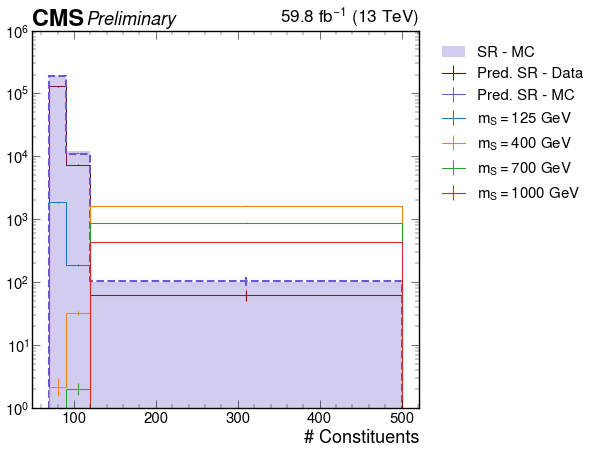

In [11]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2018'
abcd = plots['QCD_HT_'+year][plot_label]

newbins = [70, 90, 120, 500]
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 500j]
SR, SR_exp, alpha, sigma_alpha = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')
_, SR_exp_data, _, _ = ABCD_9regions_errorProp(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')

print(SR_exp_data.sum().value, np.sqrt(SR_exp_data.sum().variance))

# use the custom plot_ratio
# the hist implementation used elsewhere in the notebook doesn't use the 
# errors in the hists' bins to calculate the errors in the ratio plot
# fig, axs, _ = plot_ratio(SR_exp, SR, 
#                          "# Constituents in SUEP", "$SR_{obs}$ - QCD", "$SR_{exp}$ - Data")
# _ = axs[1].set_ylim(0,3.0)
# _ = axs[0].legend()

fig, ax = plt.subplots()
hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
hep.histplot(rebin_piecewise(SR_exp_data, newbins), yerr=True, label="Pred. SR - Data", color=default_colors['data'])    
hep.histplot(rebin_piecewise(SR, newbins), lw=3, histtype='fill', alpha=0.3,yerr=True, label="SR - MC", color=default_colors['QCD'])    
hep.histplot(rebin_piecewise(SR_exp, newbins), lw=3, yerr=True, label="Pred. SR - MC", color=default_colors['QCD'], linestyle='dashed')    

# samples = ['SUEP-m125-generic-htcut_'+year, 'SUEP-m400-generic_'+year,
#           'SUEP-m750-generic_'+year, 'SUEP-m1000-generic_'+year]
# labels = [r'$M_{S}=125$ GeV',r'$M_{S}=400$ GeV',r'$M_{S}=750$ GeV',r'$M_{S}=1000$ GeV']
masses = [125, 400, 700, 1000]
for mass in masses:
    sample = 'mS{}_T2.0_mPhi2.0_hadronic_{}'.format(mass, year)
    label = r'$m_{S}='+str(mass)+'$ GeV'
    if sample not in plots.keys(): continue
    abcd = plots[sample][plot_label]
    SUEP_SR = abcd[xregions[-2]:1.0j:sum, yregions[-2]:500j]
    print(round(SUEP_SR.sum().value), round(np.sqrt(SUEP_SR.sum().value)))
    hep.histplot(rebin_piecewise(SUEP_SR, newbins), yerr=True, label=label)    

plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.yscale("log")
plt.ylim(1e0, 1e6)

if saveToAN: plt.savefig(AN_label.format("final_bin_"+year),  bbox_inches='tight')
plt.savefig(output_label+"final_bin_"+year+file_ext,  bbox_inches='tight')

## ML ABCD - Final

(1.0, 100000.0)

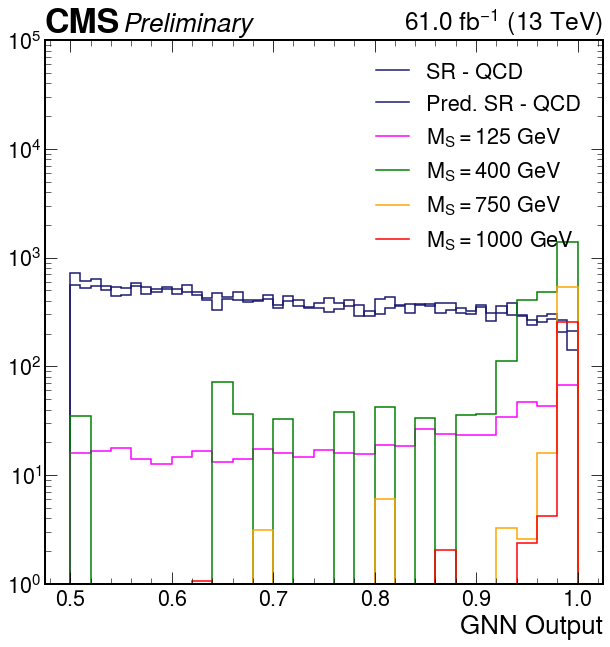

In [ ]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
year = '2018'
abcd = plots['QCD_HT_'+year][plot_label]

xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [0.0j, 0.5j, 1.0j]

SR, SR_exp = ABCD_6regions(abcd, xregions, yregions, sum_var='x')
_, SR_exp_data = ABCD_6regions(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')

# use the custom plot_ratio
# the hist implementation used elsewhere in the notebook doesn't use the 
# errors in the hists' bins to calculate the errors in the ratio plot
# fig, axs, _ = plot_ratio(SR_exp, SR, 
#                          "# Constituents in SUEP", "$SR_{obs}$ - QCD", "$SR_{exp}$ - Data")
# _ = axs[1].set_ylim(0,3.0)
# _ = axs[0].legend()

fig, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
hep.histplot(SR_exp_data, yerr=False, label="Pred. SR - Data", color=default_colors['data'])    
hep.histplot(SR, yerr=False, label="SR - QCD", color=default_colors['QCD'])    
hep.histplot(SR_exp, yerr=False, label="Pred. SR - QCD", color=default_colors['QCD'])    

samples = ['SUEP-m125-generic-htcut', 'SUEP-m400-generic',
          'SUEP-m750-generic', 'SUEP-m1000-generic']
labels = [r'$M_{S}=125$ GeV',r'$M_{S}=400$ GeV',r'$M_{S}=750$ GeV',r'$M_{S}=1000$ GeV']
for sample, label in zip(samples, labels):
    abcd = plots[sample][plot_label]
    SUEP_SR = abcd[0.5j:1.0j:sum,0.5j:1.0j:2j]
    hep.histplot(SUEP_SR, yerr=False, label=label, color=default_colors[sample])    

plt.legend(loc='best')
plt.yscale("log")
plt.ylim(1e0,1e5)

if saveToAN: plt.savefig(AN_label.format("ML_final_"+year))
plt.savefig(output_label+"ML_final_"+year+file_ext)

## ABCD - 1D Correlation

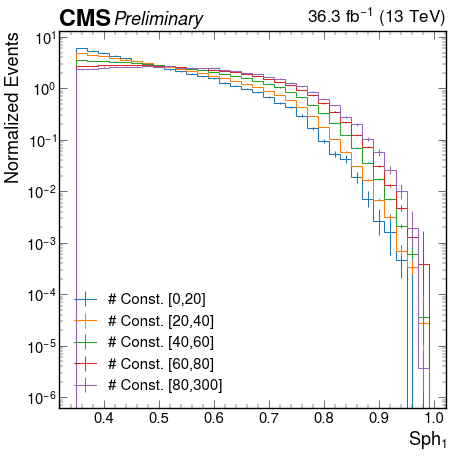

In [31]:
# parameters
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2016'
samples = ['QCD_HT_'+year, 'TTJets_'+year] # these are ADDED

fig, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(llabel='Preliminary',data=False, lumi=round(lumiLabel(year),1))

slices = [[0j,20j],[20j,40j],[40j,60j],[60j,80j],[80j,300j]]
for j in range(len(slices)):
    val_lo = slices[j][0]
    val_up = slices[j][1]

    for i, sample in enumerate(samples):
        if i==0: h = plots[sample][plot_label][0.35j::2j,val_lo:val_up:sum]
        else: h += plots[sample][plot_label][0.35j::2j,val_lo:val_up:sum]
         
    hep.histplot(h,
                 yerr=True, density=True, 
                 label="# Const. [{0},{1}]".format(round(val_lo.imag), round(val_up.imag)))    

plt.legend()
#plt.ylim(1e-6,1e0)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel(r"$Sph_{1}$")

if saveToAN: plt.savefig(AN_label.format("1D_decorrelate_" + year))
plt.savefig(output_label + "1D_decorrelate_" + year + file_ext,  bbox_inches='tight')
plt.show()

## ABCD - data/MC Control Regions

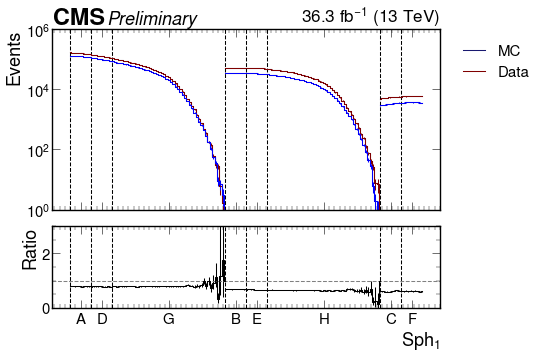

In [33]:
x = 'ABCDEFGH'
y = 'ADGBEHCF'
year = '2016'
plot_labels = ['SUEP_S1_Cluster70']
for plot_label in plot_labels:
    fig, (ax1, ax2) = plot_ratio_regions(plots, 'A_'+plot_label, 
                           'MC_'+year, 'data_'+year, 
                           y, density=False)
    ax1.legend(labels=['MC', 'Data'], loc='upper left', bbox_to_anchor=(1.02, 1))
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=ax1)

    ax1.set_ylim(1e0, 1e6)
    ax2.set_ylim(0, 3)

    if saveToAN: plt.savefig(AN_label.format("control_regions_ratio_" + year), bbox_inches='tight')
    fig.savefig(output_label + 'control_regions_ratio_' + year + file_ext, bbox_inches='tight')

In [ ]:
x = 'ABCDE'
y = 'ABCDE'
year = '2018'
plot_labels = ['single_l5_bPfcand_S1_SUEPtracks_GNN']
for plot_label in plot_labels:
    fig, (ax1, ax2) = plot_ratio_regions(plots, 'A_'+plot_label, 
                           'data_'+year, 'QCD_HT_'+year,
                           y, density=False)
    ax1.legend(labels=['QCD','Data'], loc='upper left', bbox_to_anchor=(1.02, 1))
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=ax1)

    ax1.set_ylim(1e0, 2e5)
    fig.set_size_inches(15, 6)
    
    if saveToAN: fig.savefig(AN_label.format("ML_control_regions_ratio_" + year))
    fig.savefig(output_label + 'ML_control_regions_ratio_' + year + file_ext, bbox_inches='tight')

## ABCD - Contamination Control Regions

In [5]:
mu = 1448.16781/34.8

plots['scaled_M125_2018'] = fill_utils.apply_normalization(plots['M125_2018'], mu)

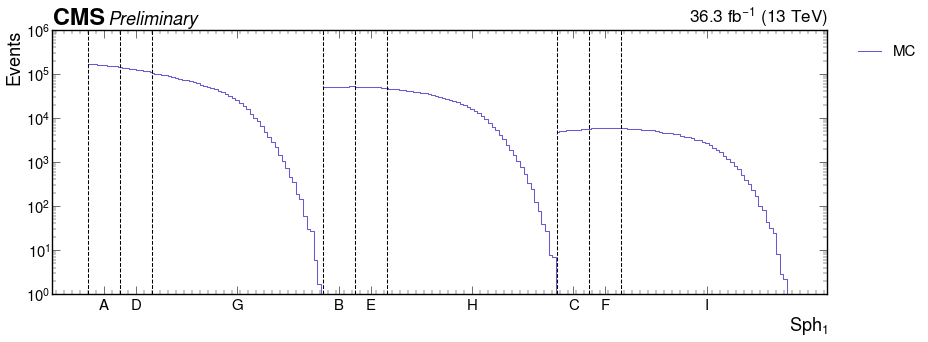

In [36]:
x = 'ABCDEFGHI'
y = 'ADGBEHCFI'
year = '2016'
plot_labels = ['SUEP_S1_Cluster70']
samples = ['MC_'+year] + ['mS{}_T2.0_mPhi2.0_hadronic_{}'.format(m, year) for m in [125,200,300,400,500,600,700,800,900,1000]]
samples = ['MC_'+year]
labels = ['MC', r'$M_{S} = 125 GeV$', r'$M_{S} = 200 GeV$', r'$M_{S} = 300 GeV$',
          r'$M_{S} = 400 GeV$', r'$M_{S} = 500 GeV$', r'$M_{S} = 600 GeV$', r'$M_{S} = 700 GeV$',
          r'$M_{S} = 800 GeV$', r'$M_{S} = 900 GeV$', r'$M_{S} = 1000 GeV$']
labels = ['MC']

for plot_label in plot_labels:

    fig, ax = plot_all_regions(plots, 'A_'+plot_label, samples, 
                               labels=labels, regions=y, density=False)
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=ax)

    ax.set_ylim(1e0, 1e6)
    ax.set_xlabel(r"$Sph_1$")

    if saveToAN: fig.savefig(AN_label.format('contamination_'+year), bbox_inches='tight')
    fig.savefig(output_label + 'contamination_' + year + file_ext, bbox_inches='tight')

## Contamination Table

In [7]:
plot_label = 'SUEP_S1_Cluster70'

masses = [125,400,700,1000]
regions = 'ABCDEFGH'

for year in ['2018']:
    QCD_sample = 'QCD_HT_'+year
    for mass in masses:
        label = '$m_{S} = '+str(mass)+' \GeV$'
        sample = 'mS{}_T2.0_mPhi2.0_hadronic_{}'.format(mass, year)
        
        line = label + ' & '
        for i, region in enumerate(regions):
            h = plots[sample][region + "_" + plot_label]
            total = h.sum().value
            line += '$' + str(round(total)) + '\\pm' + str(round(np.sqrt(total))) + '$'

            if i == len(regions)-1: line += ' \\\\'
            else: line += ' & '
        print(line)
    print()

$m_{S} = 125 \GeV$ & $4\pm2$ & $27\pm5$ & $94\pm10$ & $6\pm2$ & $33\pm6$ & $141\pm12$ & $61\pm8$ & $1360\pm37$ \\
$m_{S} = 400 \GeV$ & $0\pm1$ & $1\pm1$ & $11\pm3$ & $0\pm0$ & $0\pm0$ & $23\pm5$ & $0\pm1$ & $1\pm1$ \\
$m_{S} = 700 \GeV$ & $0\pm0$ & $0\pm0$ & $8\pm3$ & $0\pm0$ & $0\pm0$ & $12\pm4$ & $0\pm0$ & $0\pm0$ \\
$m_{S} = 1000 \GeV$ & $0\pm0$ & $0\pm0$ & $2\pm2$ & $0\pm0$ & $0\pm0$ & $8\pm3$ & $0\pm0$ & $0\pm0$ \\



In [8]:
regions = 'ABCDEFGH'

for year in ['2018']:
    QCD_sample = 'QCD_HT_'+year
    for mass in masses:
        label = '$m_{S} = '+str(mass)+' \GeV$'
        sample = 'mS{}_T2.0_mPhi2.0_hadronic_{}'.format(mass, year)
        
        line = label + ' & '
        for i, region in enumerate(regions):
            h = plots[sample][region + "_" + plot_label]
            hQCD = plots[QCD_sample][region + "_" + plot_label]
            alpha = h.sum().value
            beta = hQCD.sum().value
            total = alpha/beta * 100
            err = np.sqrt(alpha * (beta**-2) + (alpha**2) * (beta**-3)) * 100
            line += '$' + str(round(total,2)) + '\\pm' + str(round(err,2)) + '$'

            if i == len(regions)-1: line += ' \\\\'
            else: line += ' & '
        print(line)
    print()

$m_{S} = 125 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.12\pm0.01$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.16\pm0.01$ & $0.0\pm0.0$ & $0.09\pm0.0$ \\
$m_{S} = 400 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.01\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.03\pm0.01$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$m_{S} = 700 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.01\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.01\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$m_{S} = 1000 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.01\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\



In [24]:
#ML

regions = 'ABCDE'

for year in ['2018']:
    QCD_sample = 'QCD_HT_'+year
    for label, sample in zip(labels, samples):
        line = label + ' & '
        for i, region in enumerate(regions):
            h = plots[sample][region + "_" + plot_label]
            hQCD = plots[QCD_sample][region + "_" + plot_label]
            alpha = h.sum().value
            beta = hQCD.sum().value
            total = alpha/beta * 100
            err = np.sqrt(alpha * (beta**-2) + (alpha**2) * (beta**-3)) * 100
            line += '$' + str(round(total,2)) + '\\pm' + str(round(err,2)) + '$'

            if i == len(regions)-1: line += ' \\\\'
            else: line += ' & '
        print(line)
    print()

QCD & $100.0\pm0.07$ & $100.0\pm1.01$ & $100.0\pm0.08$ & $100.0\pm1.18$ & $100.0\pm0.06$ \\
$M_{S} = 125 GeV$ & $0.0\pm0.0$ & $0.14\pm0.03$ & $0.0\pm0.0$ & $0.25\pm0.04$ & $0.04\pm0.0$ \\
$M_{S} = 400 GeV$ & $0.0\pm0.0$ & $0.35\pm0.04$ & $0.0\pm0.0$ & $0.5\pm0.06$ & $0.0\pm0.0$ \\
$M_{S} = 750 GeV$ & $0.0\pm0.0$ & $0.03\pm0.01$ & $0.0\pm0.0$ & $0.09\pm0.02$ & $0.0\pm0.0$ \\
$M_{S} = 1000 GeV$ & $0.0\pm0.0$ & $0.01\pm0.01$ & $0.0\pm0.0$ & $0.05\pm0.02$ & $0.0\pm0.0$ \\



## ML Systematic

In [ ]:
# parameters
plot_label = '2D_ISR_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNNInverted'
sample1 = 'QCD_HT_2018'
sample2 = 'data_2018'

h1 = plots[sample1][plot_label]
h2 = plots[sample2][plot_label]

h1 = h1[0.0j::sum, 0.0j::5j]
h2 = h2[0.0j::sum, 0.0j::5j]

fig = plt.figure(figsize=(10, 8))
      
fig, axs, _ = plot_ratio([h1, h2] labels=[r'QCD - $H_T$ Binned', 'Data'])
axs[0].legend()
axs[1].set_ylim(0.5,2.5)
#axs[0].set_yscale("linear")
cms = axs[0].text(
    -0.25, 4.5e7, u"CMS $\it{Preliminary}$",
    fontsize=24, fontweight='bold',
)
lumi = axs[0].text(
    0.78, 4.5e7, r"%.1f fb$^{-1}$ (13 TeV)" % round(lumis[year]/1000,1),
    fontsize=22, 
)
plt.savefig(AN_label.format("ML_systematic_"+year))

## Systematic Uncertainties

puweights
1000 2.0 2.0 generic
	Up Ratio -0.537214915511397
	Down Ratio 0.38932789416634694


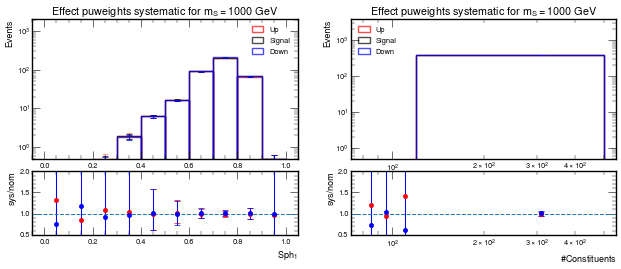

track
1000 2.0 2.0 generic
	Up Ratio 0.7571467155065736
	Down Ratio -0.15155390901173682


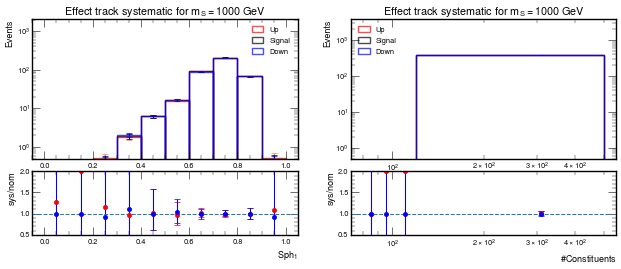

JER
1000 2.0 2.0 generic
	Up Ratio 0.04024320836881756
	Down Ratio -0.08000505411823733


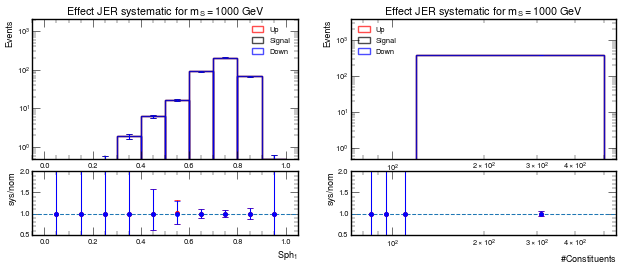

JES
1000 2.0 2.0 generic
	Up Ratio 0.6460122477425223
	Down Ratio -1.0077971769778316


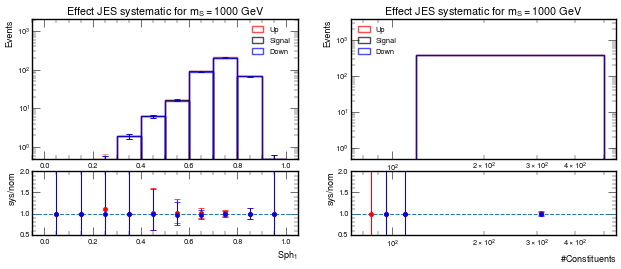

trigSF
1000 2.0 2.0 generic
	Up Ratio 0.9959431018241593
	Down Ratio -0.9959431018242371


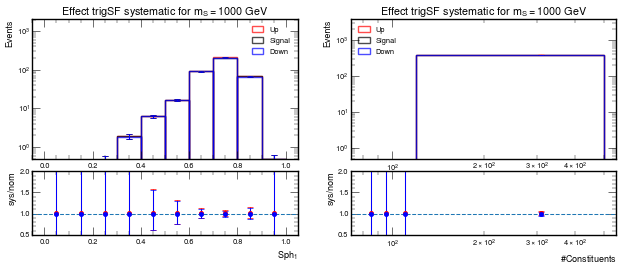

PSWeight_ISR
1000 2.0 2.0 generic
	Up Ratio -6.999603630095375
	Down Ratio 8.434169109740285


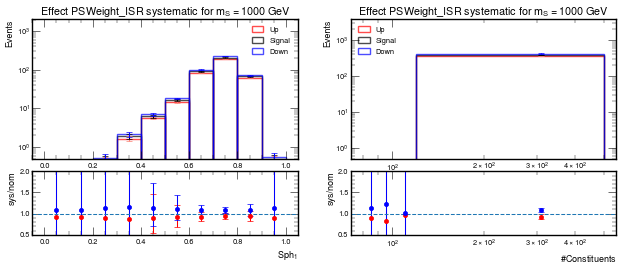

PSWeight_FSR
1000 2.0 2.0 generic
	Up Ratio 0.09246423203814746
	Down Ratio -0.08927758725444379


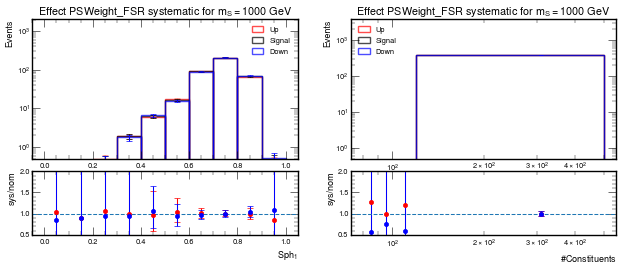

prefire
1000 2.0 2.0 generic
	Up Ratio 0.0
	Down Ratio 0.0


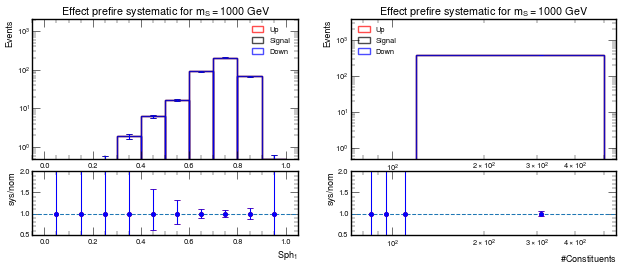

higgs_weights
1000 2.0 2.0 generic
	Up Ratio 0.0
	Down Ratio 0.0


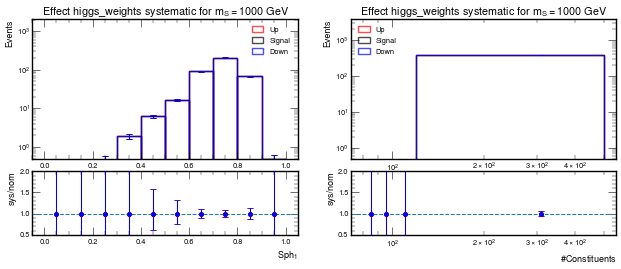

puweights
400 2.0 2.0 generic
	Up Ratio -0.39354709872960747
	Down Ratio 0.3632553017868245


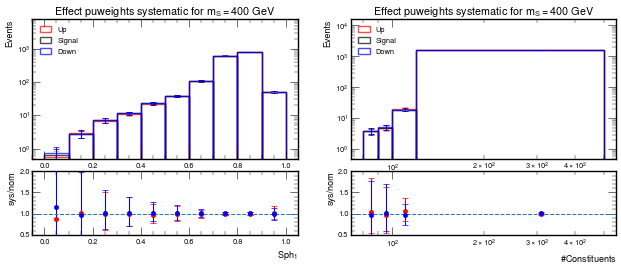

track
400 2.0 2.0 generic
	Up Ratio 0.5169823023994047
	Down Ratio -0.14560078636046692


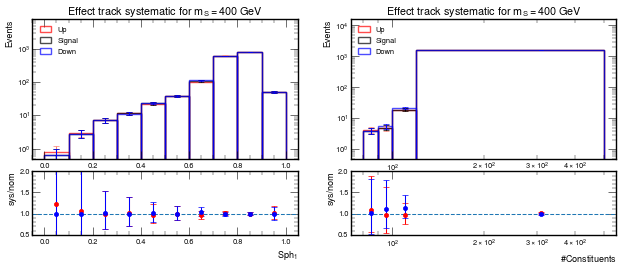

JER
400 2.0 2.0 generic
	Up Ratio 0.49393082367987784
	Down Ratio -0.43091085060265044


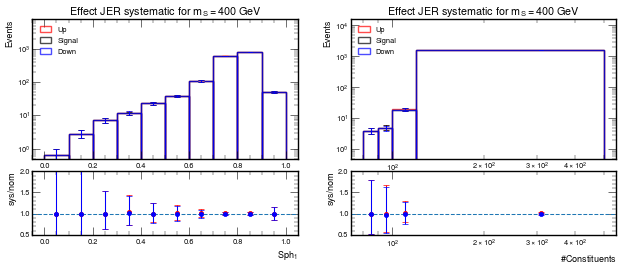

JES
400 2.0 2.0 generic
	Up Ratio 4.109581341573043
	Down Ratio -4.03266128505253


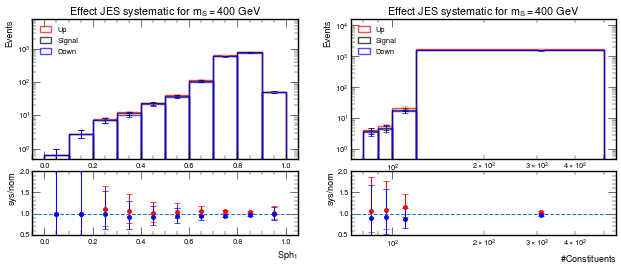

trigSF
400 2.0 2.0 generic
	Up Ratio 1.0044729032180788
	Down Ratio -1.0044729032180344


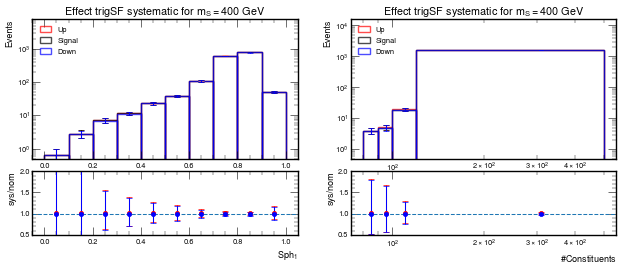

PSWeight_ISR
400 2.0 2.0 generic
	Up Ratio -8.077526652031985
	Down Ratio 9.784120779047957


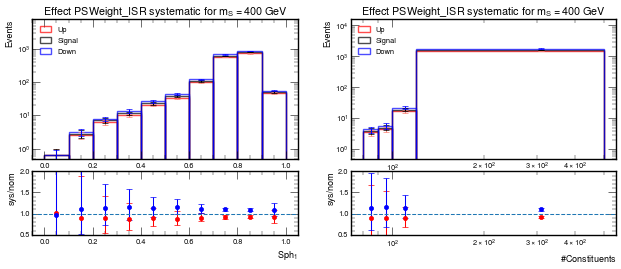

PSWeight_FSR
400 2.0 2.0 generic
	Up Ratio -0.4417571697547862
	Down Ratio 0.4113508505952712


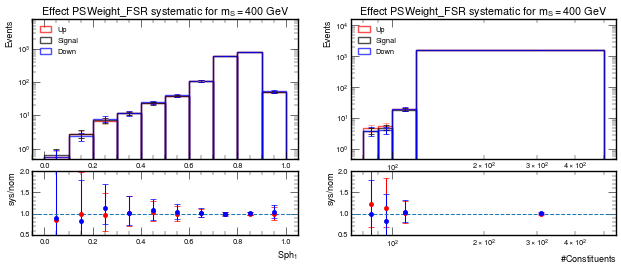

prefire
400 2.0 2.0 generic
	Up Ratio 0.0
	Down Ratio 0.0


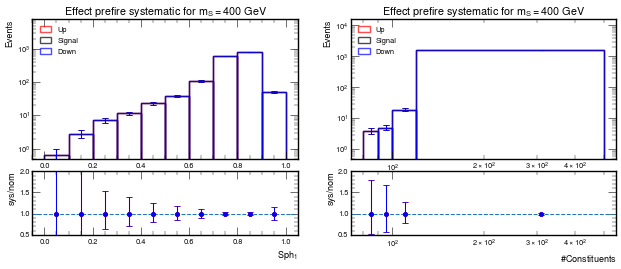

higgs_weights
400 2.0 2.0 generic
	Up Ratio 0.0
	Down Ratio 0.0


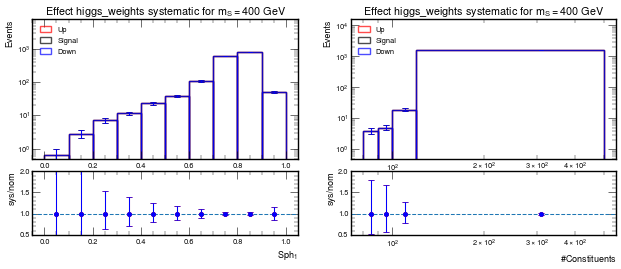

puweights
125 2.0 2.0 generic
	Up Ratio -0.005749098957918974
	Down Ratio 0.06068698338397294


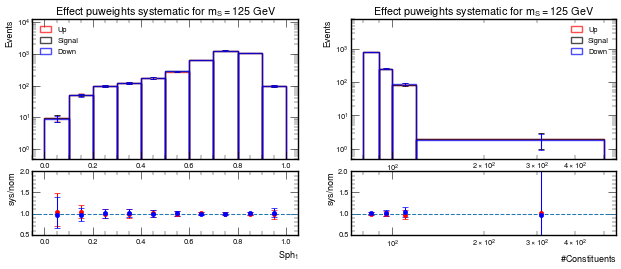

track
125 2.0 2.0 generic
	Up Ratio 0.317844831840719
	Down Ratio -0.17568400721847954


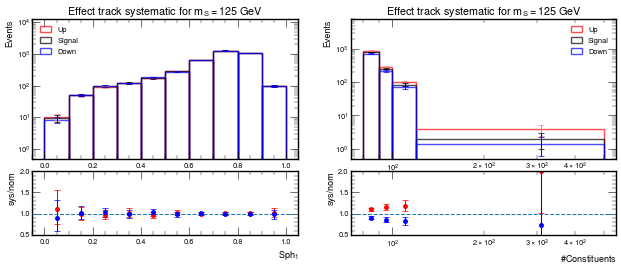

JER
125 2.0 2.0 generic
	Up Ratio 0.38714931386381046
	Down Ratio -0.4908282091462879


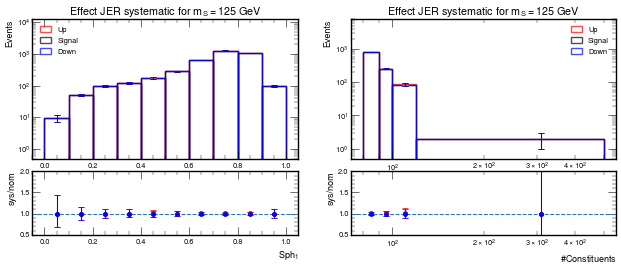

JES
125 2.0 2.0 generic
	Up Ratio 4.154780927007673
	Down Ratio -4.347234708049275


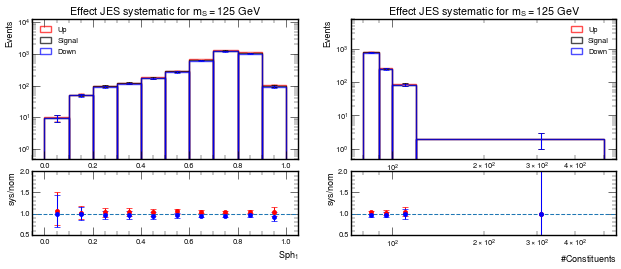

trigSF
125 2.0 2.0 generic
	Up Ratio 1.0056208784273046
	Down Ratio -1.005620878427449


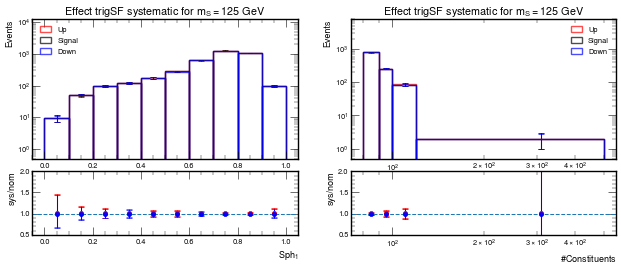

PSWeight_ISR
125 2.0 2.0 generic
	Up Ratio -8.661087835769054
	Down Ratio 10.54409762023225


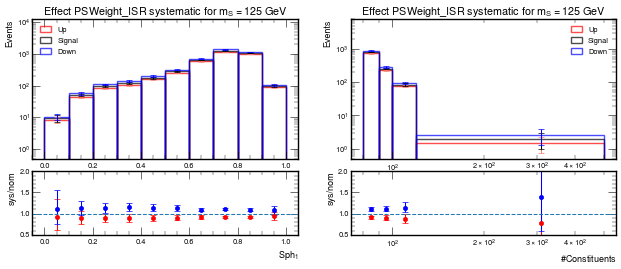

PSWeight_FSR
125 2.0 2.0 generic
	Up Ratio -0.06413996750399553
	Down Ratio 0.3881524262666858


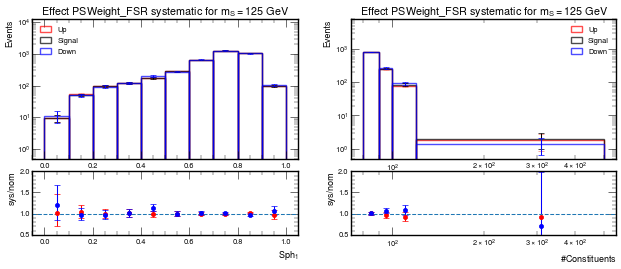

prefire
125 2.0 2.0 generic
	Up Ratio 0.0
	Down Ratio 0.0


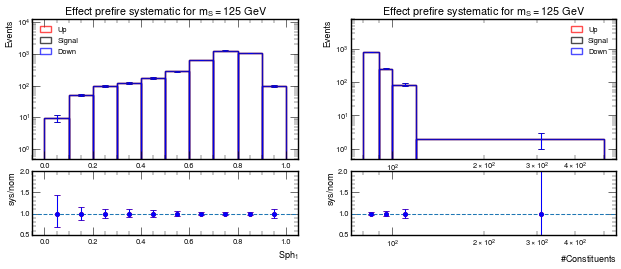

higgs_weights
125 2.0 2.0 generic
	Up Ratio 0.0
	Down Ratio 0.0


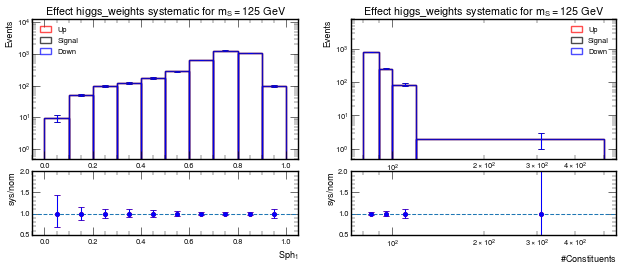

In [107]:
sys_list =  ['puweights', 'track','JER','JES','trigSF','PSWeight_ISR','PSWeight_FSR','prefire','higgs_weights']
mass_list = [1000, 400, 125]
decay = 'generic'
year = '2018'
mPhi = '2.0'
T = '2.0'

nconst_bins = [80, 90, 100, 120, 500]
sph_bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

plt.rcParams.update({'font.size': 13})

upratios, downratios = nested_dict(3, float), nested_dict(3, float)
for mass in mass_list:
    
    plot = plots['mS{}_T{}_mPhi{}_{}_{}'.format(mass, T, mPhi, decay, year)]

    for sys in sys_list:

        sig_nconst = plot['SUEP_nconst_Cluster70']
        up_nconst = plot['SUEP_nconst_Cluster70_{}_up'.format(sys)]
        down_nconst = plot['SUEP_nconst_Cluster70_{}_down'.format(sys)]

        sig_sph = plot['SUEP_S1_Cluster70']
        up_sph = plot['SUEP_S1_Cluster70_{}_up'.format(sys)]
        down_sph = plot['SUEP_S1_Cluster70_{}_down'.format(sys)]
        
        print(sys)
        print(mass, mPhi, T, decay)
        upratio = (up_nconst.sum().value/sig_nconst.sum().value - 1)*100
        print("\tUp Ratio", upratio)
        upratios[str(mass)][year][sys] = upratio
        #print("Down", down_nconst.sum().value,  np.sqrt(down_nconst.sum().variance))
        downratio = (down_nconst.sum().value/sig_nconst.sum().value - 1)*100
        print("\tDown Ratio", downratio)
        downratios[str(mass)][year][sys] = downratio

        # Change the bin sizes

        sig_nconst = rebin_piecewise(sig_nconst, nconst_bins)
        up_nconst = rebin_piecewise(up_nconst, nconst_bins)
        down_nconst = rebin_piecewise(down_nconst, nconst_bins)

        sig_sph = rebin_piecewise(sig_sph, sph_bins)
        up_sph = rebin_piecewise(up_sph, sph_bins)
        down_sph = rebin_piecewise(down_sph, sph_bins)

        plt.figure(figsize=(16,8))
        plt.gcf().subplots_adjust(bottom=0.15, left=0.17)


        ### Plot distribution for number of constituents

        # Plot histograms of systematics 
        up,down,sig = up_sph,down_sph,sig_sph
        ax1 = plt.subplot2grid((4,2), (0,0),rowspan=2)
        ax1.bar(*up.axes.centers, up.values(), width=up.axes.widths[0],yerr=up.variances()**0.5,fill=False,color= 'salmon',edgecolor='red',linewidth=2,alpha =0.7,label='Up',capsize=4,ecolor = 'salmon')
        ax1.bar(*sig.axes.centers, sig.values(), width=sig.axes.widths[0], yerr=sig.variances()**0.5,fill=False,linewidth=2,color= 'grey',edgecolor='black',alpha=0.7, label='Signal',capsize=4, ecolor='black')
        ax1.bar(*down.axes.centers, down.values(), width=down.axes.widths[0],yerr=down.variances()**0.5,color= 'lightblue',fill=False,edgecolor='blue',alpha=0.7,linewidth=2,label='Down',capsize=4,ecolor='blue')
        ax1.set_title("Effect "+sys+ " systematic for $m_{S}=$"+str(mass)+ " GeV")
        ax1.set_ylim([0.5,max(sig.values())*10])
        ax1.set_ylabel("Events")
        ax1.set_yscale('log')
        ax1.legend() 


        # Make ratio plot
        up_ratio = np.divide( up.values(), sig.values(), out=np.ones_like(up.values()), where=sig.values()!=0) #Overestimate
        down_ratio = np.divide( down.values(), sig.values(), out=np.ones_like(down.values()), where=sig.values()!=0) #Underestimate

        #Calculate errors in up_ratio and down_ratio
        up_err = hist.intervals.ratio_uncertainty(up.values(),sig.values()) #This ratio uncertainty is the poisson interval (for a coverage of 0.68) divided by sig
        down_err = hist.intervals.ratio_uncertainty(down.values(),sig.values())

        ax2 = plt.subplot2grid((4,2), (2,0),sharex=ax1)
        ups = ax2.errorbar(*sig.axes.centers, up_ratio,fmt='o', color='red', label = 'up',yerr= up_err,capsize=4)
        downs = ax2.errorbar(*sig.axes.centers, down_ratio,fmt='o', color='blue', label = 'down',yerr= down_err,capsize=4)
        ax2.axhline(1,ls='--')
        ax2.set_ylim([0.5,2.0])
        ax2.set_xlabel('$Sph_1$')
        ax2.set_ylabel('sys/nom')


        ### Plot distribution for number of sphericity

        # Plot histograms of systematics 
        up,down,sig = up_nconst,down_nconst,sig_nconst
        ax3 = plt.subplot2grid((4,2), (0,1),rowspan=2)
        ax3.bar(*up.axes.centers, up.values(), width=up.axes.widths[0],yerr=up.variances()**0.5,fill=False,color= 'salmon',edgecolor='red',linewidth=2,alpha =0.7,label='Up',capsize=4,ecolor = 'salmon')
        ax3.bar(*sig.axes.centers, sig.values(), width=sig.axes.widths[0], yerr=sig.variances()**0.5,fill=False,linewidth=2,color= 'grey',edgecolor='black',alpha=0.7, label='Signal',capsize=4, ecolor='black')
        ax3.bar(*down.axes.centers, down.values(), width=down.axes.widths[0],yerr=down.variances()**0.5,color= 'lightblue',fill=False,edgecolor='blue',alpha=0.7,linewidth=2,label='Down',capsize=4,ecolor='blue')
        ax3.set_title("Effect "+sys+ " systematic for $m_{S}=$"+str(mass) +" GeV")
        ax3.set_ylim([0.5,max(sig.values())*10])
        ax3.set_ylabel("Events")
        ax3.set_yscale('log')
        ax3.legend()


        # Make ratio plot
        up_ratio = np.divide( up.values(), sig.values(), out=np.ones_like(up.values()), where=sig.values()!=0) #Overestimate
        down_ratio = np.divide( down.values(), sig.values(), out=np.ones_like(down.values()), where=sig.values()!=0) #Underestimate

        #Calculate errors in up_ratio and down_ratio
        up_err = hist.intervals.ratio_uncertainty(up.values(),sig.values()) #This ratio uncertainty is the poisson interval (for a coverage of 0.68) divided by sig
        down_err = hist.intervals.ratio_uncertainty(down.values(),sig.values())

        ax4 = plt.subplot2grid((4,2), (2,1),sharex=ax3)
        ups = ax4.errorbar(*sig.axes.centers, up_ratio,fmt='o', color='red', label = 'up',yerr= up_err,capsize=4)
        downs = ax4.errorbar(*sig.axes.centers, down_ratio,fmt='o', color='blue', label = 'down',yerr= down_err,capsize=4)
        ax4.axhline(1,ls='--')
        ax4.set_ylim([0.5,2.0])
        ax4.set_xlabel("$\# Constituents$")
        ax4.set_ylabel('sys/nom')
        ax4.set_xscale('log')
        
        #plt.savefig(AN_label.format('systematic_variations_' + sys +'_mS' + str(mass)),bbox_inches='tight')
        
        plt.savefig(output_label + 'systematic_variations_' + sys +'_mS' + str(mass), bbox_inches='tight')
        plt.show()


# print('done')

In [153]:
mass = '400'

correlations = {
    'puweights': "Correlated",
    'track': "Uncorrelated",
    'JER': "Correlated",
    'JES': "Correlated", 
    'trigSF': "Uncorrelated",
    'PSWeight_ISR': "Uncorrelated",
    'PSWeight_FSR': "Uncorrelated",
    'prefire': "Correlated",
    'higgs_weights': "Correlated"
}
labels = {
    'puweights': "Pileup Reweighting",
    'track': "Track Reconstruction",
    'JER': "JER",
    'JES': "JEC", 
    'trigSF': "Trigger Scale Factors",
    'PSWeight_ISR': "Parton Shower Weights - ISR",
    'PSWeight_FSR': "Parton Shower Weights - FSR",
    'prefire': "Prefire Weights",
    'higgs_weights': "Higgs Reweighting"
}
title = r'Systematic & Correlation & \% Effect 2016 & \% Effect in 2017 & \% Effect in 2018\\'
table = [title, r'\hline']
for iRow in range(len(sys_list)):
    
    sys = sys_list[iRow]
    row = labels[sys] + ' & ' + correlations[sys] + ' & '
    years = [2016, 2017, 2018]
    for year in years:
        
        if str(year) in upratios[mass].keys():
            val = max(abs(upratios[mass][str(year)][sys]), abs(downratios[mass][str(year)][sys]))
            val = round(val,2)
        else:
            val = '-'
            
        if year == years[-1]:
            row += str(val) + r' \\'
        else:
            row += str(val) + ' & '
        
    table.append(row)

lumirow = r'Luminosity Uncertainty & Partially & 1.2 & 2.3 & 2.5\\'
table.append(lumirow)

# copy and paste output into latex!
for row in table: print(row)

Systematic & Correlation & \% Effect 2016 & \% Effect in 2017 & \% Effect in 2018\\
\hline
Pileup Reweighting & Correlated & - & - & -0.39 \\
Track Reconstruction & Uncorrelated & - & - & 0.52 \\
JER & Correlated & - & - & 0.49 \\
JEC & Correlated & - & - & 4.11 \\
Trigger Scale Factors & Uncorrelated & - & - & 1.0 \\
Parton Shower Weights - ISR & Uncorrelated & - & - & 9.78 \\
Parton Shower Weights - FSR & Uncorrelated & - & - & -0.44 \\
Prefire Weights &  & - & - & 0.0 \\
Higgs Reweighting & Correlated & - & - & 0.0 \\
Luminosity Uncertainty & Partially & 1.2 & 2.3 & 2.5\\
